# Real data validation

In [125]:
from prediction_utils import get_galaxy_filename

measured_path = [get_galaxy_filename('RI using kovats of Mass spectra from RAMClustR', '../data', ["enh", "pred"])]
matched_path = [get_galaxy_filename('matchms output formatter _get-thresholded-data_', '../data')]
reference_lib = "../data/1_rcx_gc-orbitrap_metabolites_20210817.msp.msp"
concs = ["all"]


predictors = ["mlp_2_.3", "mlp_2_.1", "GPT2_5"]
predictor= predictors[0]

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
from matchms.importing import load_from_msp
from data_utils import spectrum_processing, get_n_samples
from helpers import get_mz_vector, get_his_size, compact_to_mz
from visual_utils import plot_spectrum_sample_prediction

import numpy as np
from matchms.filtering import normalize_intensities


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matchms.plotting import spectrum_plots

## Data loading

In [127]:
def get_spectra(path):
    # Load data from MSP file and apply filters
    spectrums = [*load_from_msp(path,  metadata_harmonization=False)]
    # Omit spectrums that didn't qualify for analysis
    spectrums = [normalize_intensities(s) for s in spectrums if s is not None]
    # Create spectrum documents
    return spectrums

# spectrums_val = get_spectra(data_val_path)
# spectrums_test = get_spectra(data_test_path)

In [128]:
measured, matched, enhanced = dict(), dict(), dict()
for i, conc in enumerate(concs):
    measured[conc] = {s.metadata["compound_name"]:s for s in get_spectra(f"{measured_path[i]}")}
    measured[conc+"_enh"] = {s.metadata["compound_name"]:s for s in get_spectra(f"{measured_path[i][:-4]}_enh_{predictor}.msp")}
    enhanced[conc] = {s.metadata["compound_name"]:s for s in get_spectra(f"{measured_path[i][:-4]}_enh_{predictor}.msp")}
    
    
    matched[conc] = pd.read_csv(f"{matched_path[i]}", sep="\t", names=["id", "name", "n_ions", 	"confidence"]).iloc[1:]
    matched[conc+"_enh"] = pd.read_csv(f"{matched_path[i]}", sep="\t", names=["id", "name", "n_ions", 	"confidence"]).iloc[1:]
    

In [129]:
library = {s.metadata["compound_name"]:s for s in get_spectra(reference_lib)}

len(measured["32"])

In [103]:
#measured["0"]["C001"]

## Pair measured spectra with database spectra

In [104]:
# from collections import defaultdict
# paired = defaultdict(lambda x: defaultdict(dict))
# for conc in concs:
#     for s in measured[conc]:
#         matched[conc]["id"] == s.metadata["compound_name"]
#         paired[conc]["id"][] = 


In [105]:
def couple(meas_id, measured, library, matched, conc="0", repetition_count=0):
    mask = matched[conc]["id"] == meas_id
    if not (mask).any():
        return measured[conc][meas_id], None
    compound_name = matched[conc]["name"][mask].values[repetition_count]
    return measured[conc][meas_id], library[compound_name]

In [106]:
#couple("C019", measured, library, matched, conc="0")

In [107]:
conc = "all"

In [108]:

# for meas_id in measured[conc]:
#     spec, lib = couple(meas_id, measured, library, matched, conc=conc)
#     if lib is not None:
#         false_detected = set(spec.peaks.mz.astype(int)).difference(set(lib.peaks.mz.astype(int)))
#         missing_mz = set(lib.peaks.mz.astype(int)).difference(set(lib.peaks.mz.astype(int)).intersection(set(spec.peaks.mz.astype(int))))
#         plot_spectrum_sample_prediction(lib, missing_mz, [], false_detected, [])
        
        

## Experiment 1 - take the compounds and observe

In [89]:
def couple_plot(meas_id, measured, library, matched, conc="0", repetition_count=0):
    spec, lib = couple(meas_id, measured, library, matched, conc=conc, repetition_count=repetition_count)
    
    if lib is not None:
        false_detected = set(spec.peaks.mz.astype(int)).difference(set(lib.peaks.mz.astype(int)))
        missing_mz = set(lib.peaks.mz.astype(int)).difference(set(lib.peaks.mz.astype(int)).intersection(set(spec.peaks.mz.astype(int))))
        print(f"Spectrum {meas_id} - detected peaks: {len(spec.peaks.mz)}")
        print(f"When matched to {lib.metadata['compound_name']}: {matched[conc][matched[conc].id==meas_id].n_ions.values[repetition_count]} matched ions with {matched[conc][matched[conc].id==meas_id].confidence.values[repetition_count]} total confidence")
        print(f"In this match, {len(false_detected)} peaks were not in library spectrum and {len(missing_mz)} peaks from library spectrum were missing")
        plot_spectrum_sample_prediction(lib, missing_mz, [], false_detected, [])
        print()
    return spec, lib


Spectrum C02 - detected peaks: 54
When matched to Lysine_4TMS: 23 matched ions with 0.92281020332912 total confidence
In this match, 20 peaks were not in library spectrum and 25 peaks from library spectrum were missing


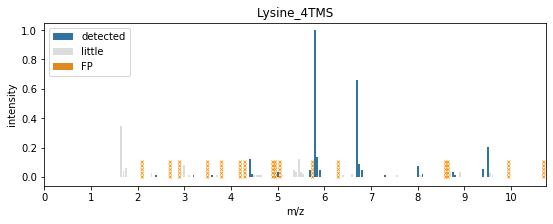

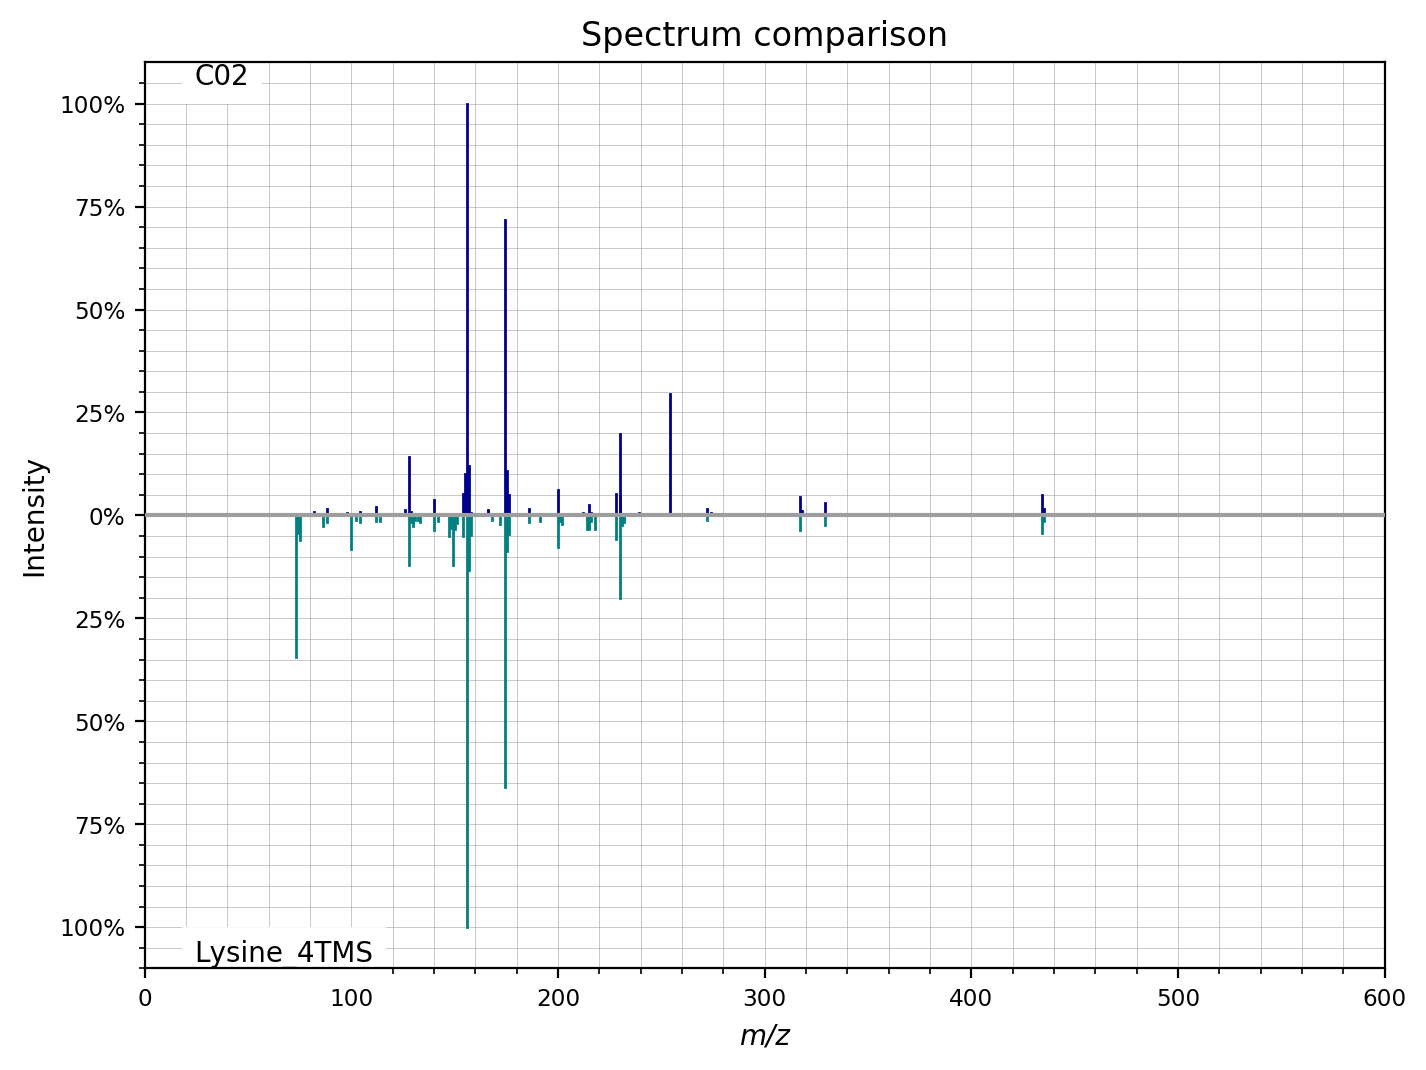

Spectrum C02 - detected peaks: 54
When matched to Pipecolinic acid_2TMS: 4 matched ions with 0.7553661382849925 total confidence
In this match, 40 peaks were not in library spectrum and 7 peaks from library spectrum were missing


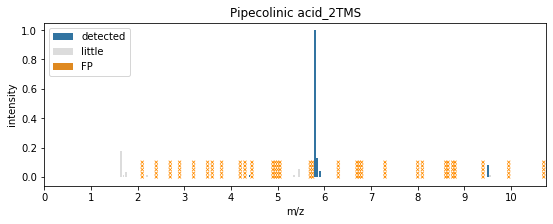

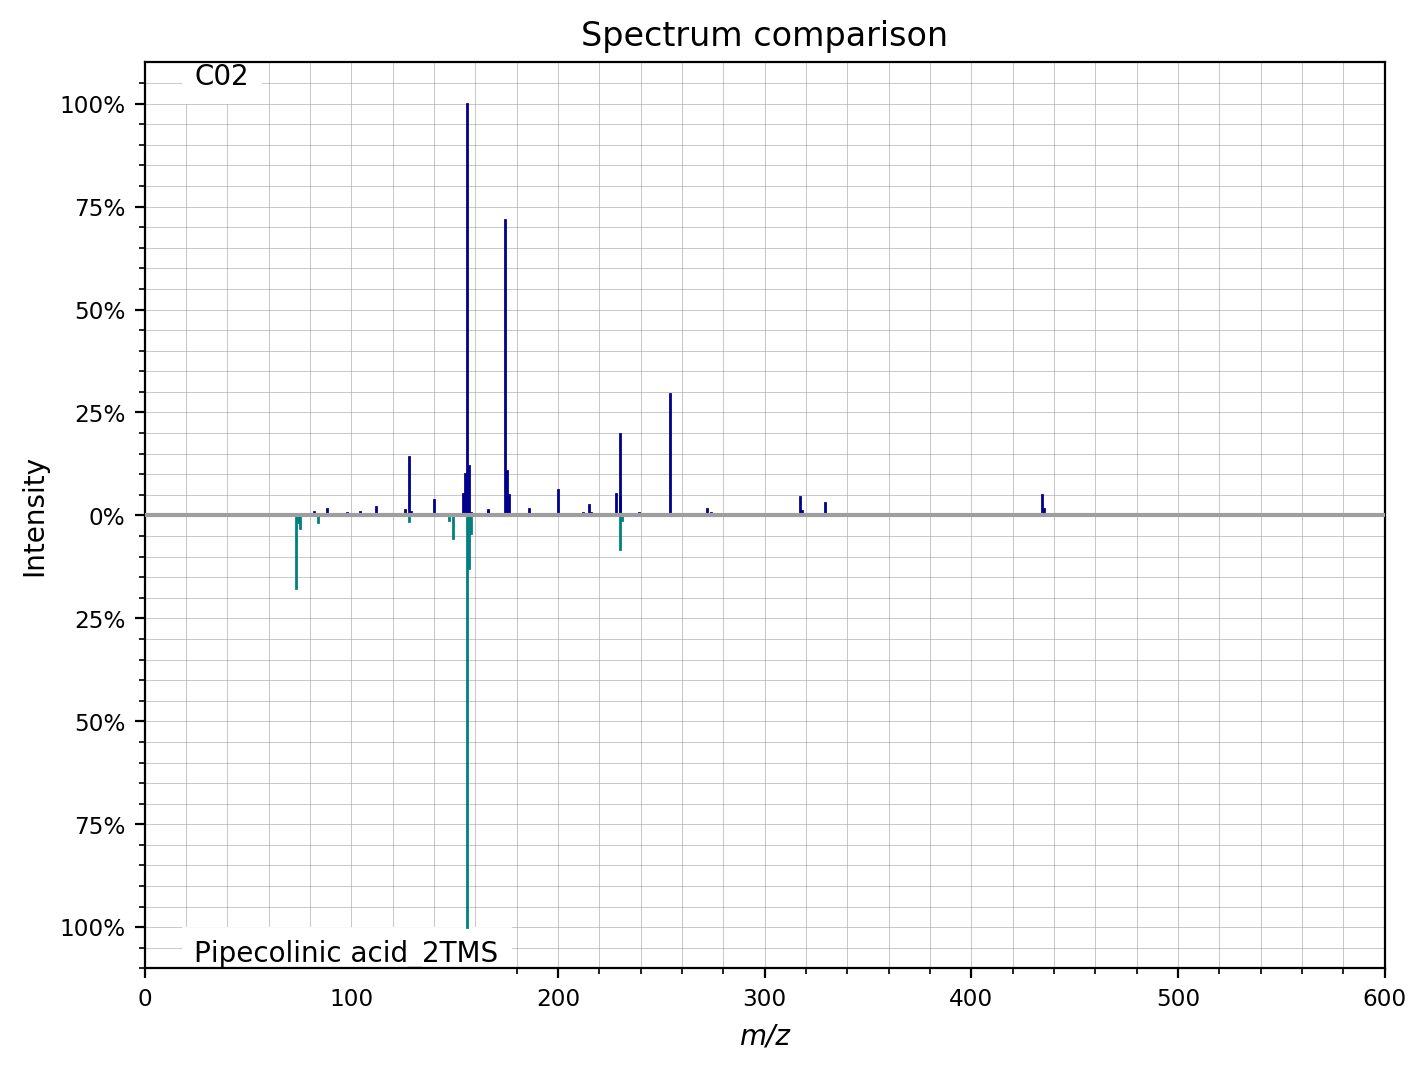

Spectrum C06 - detected peaks: 32
When matched to Arabitol_5TMS: 9 matched ions with 0.796552247937575 total confidence
In this match, 20 peaks were not in library spectrum and 33 peaks from library spectrum were missing


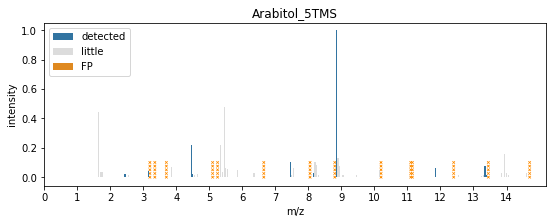

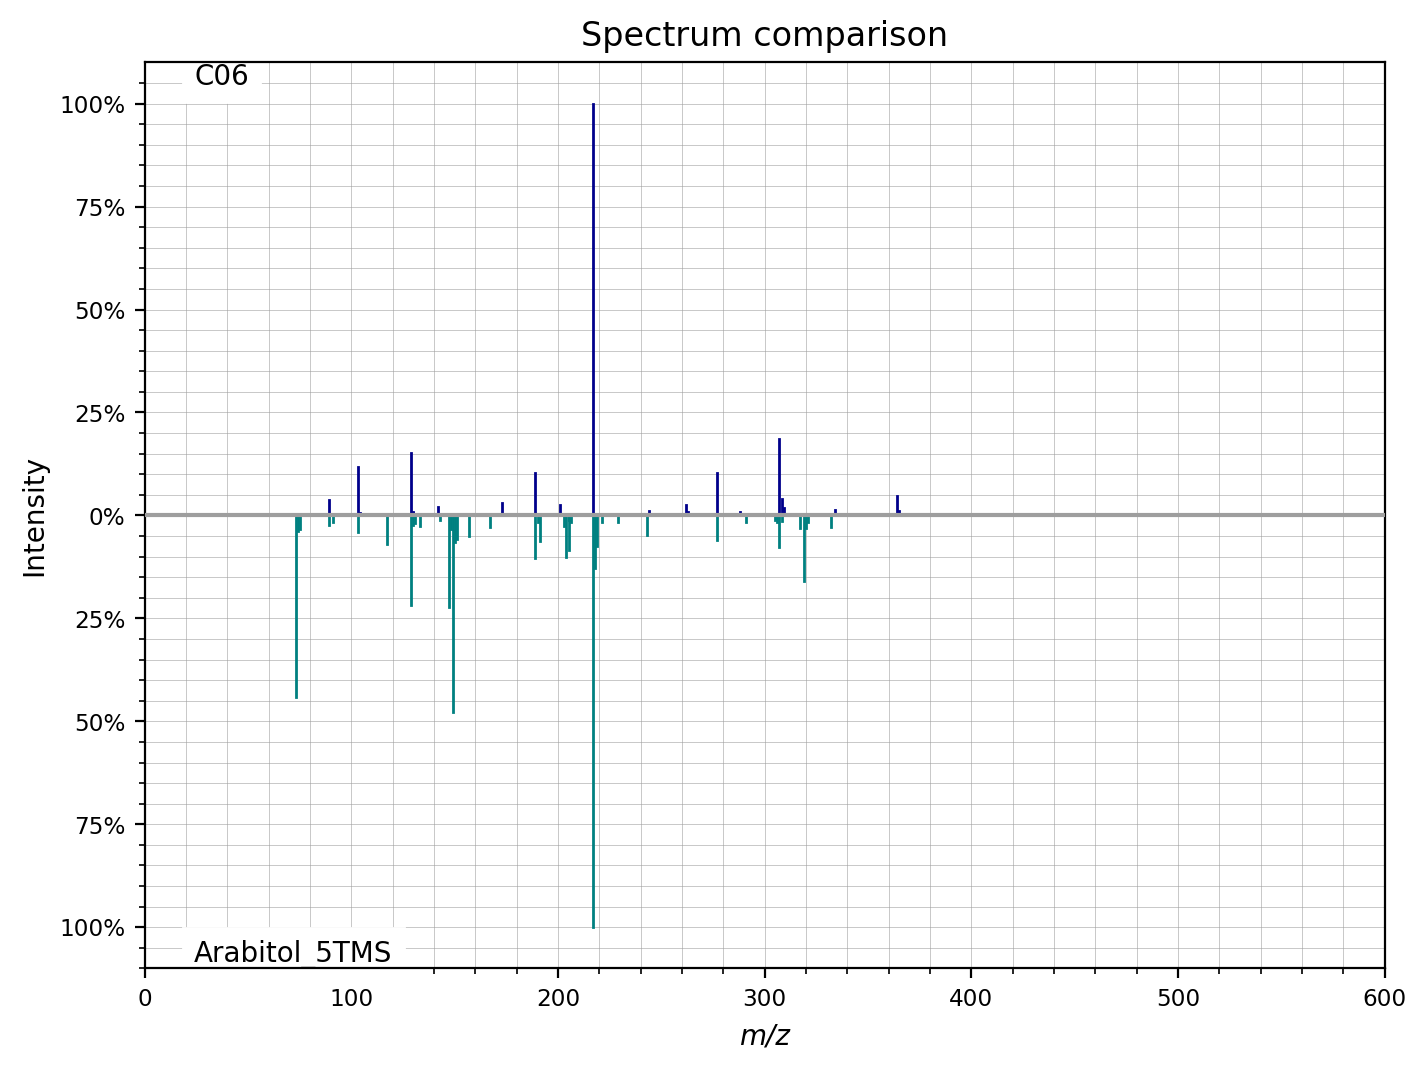

Spectrum C06 - detected peaks: 32
When matched to Arabitol_5TMS: 9 matched ions with 0.7972294938455029 total confidence
In this match, 20 peaks were not in library spectrum and 33 peaks from library spectrum were missing


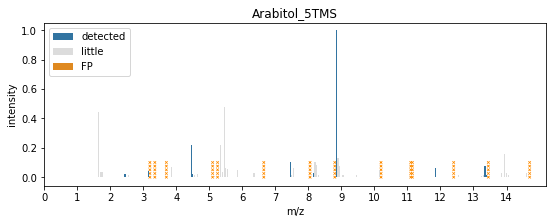

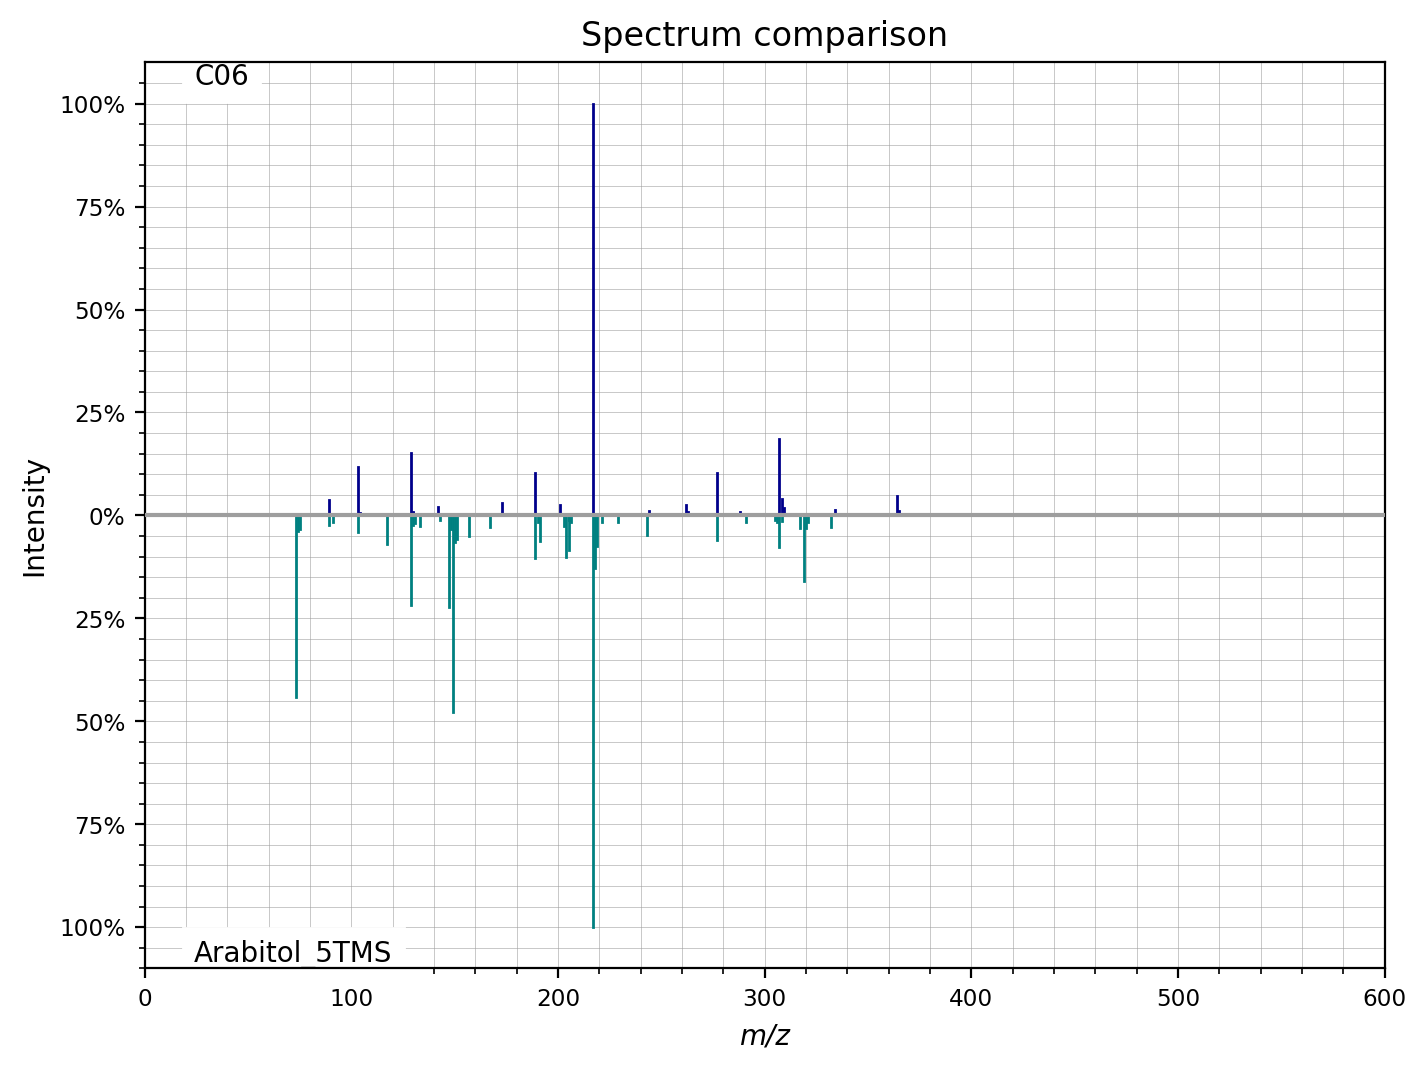

Spectrum C06 - detected peaks: 32
When matched to Arabitol_5TMS: 10 matched ions with 0.796552247937575 total confidence
In this match, 20 peaks were not in library spectrum and 33 peaks from library spectrum were missing


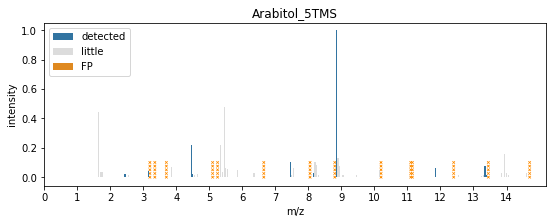

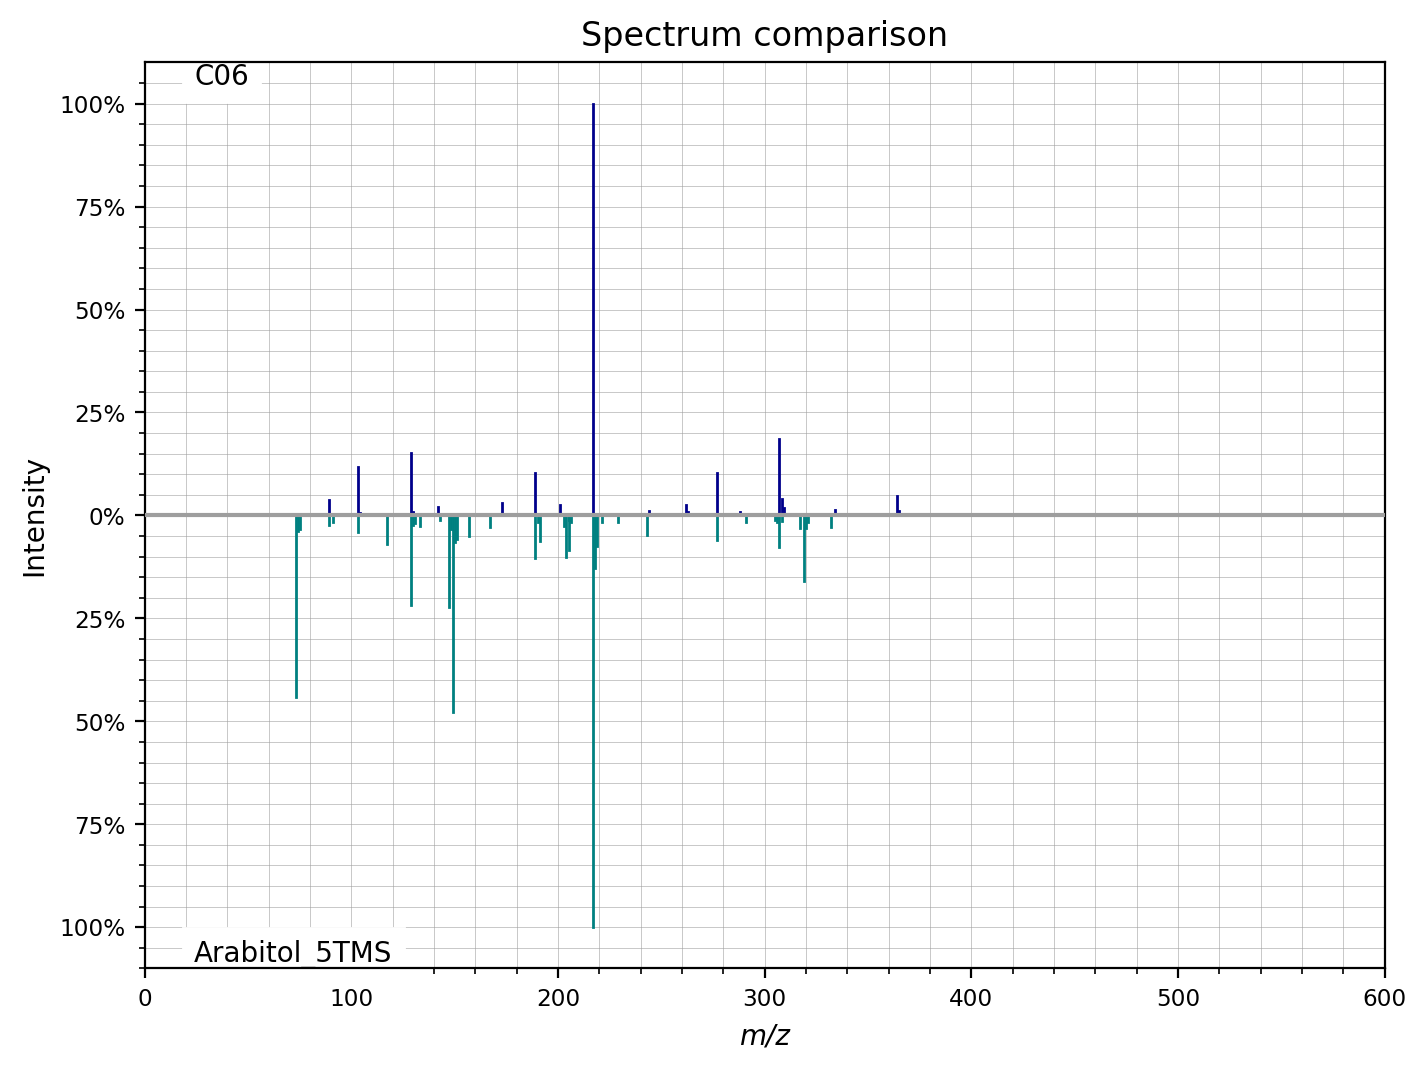

Spectrum C06 - detected peaks: 32
When matched to Arabitol_5TMS: 10 matched ions with 0.7972294938455029 total confidence
In this match, 20 peaks were not in library spectrum and 33 peaks from library spectrum were missing


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f710789ad90> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f71075ec950> (for post_execute):


KeyboardInterrupt: 

In [90]:
from collections import defaultdict

repetition_counter = defaultdict(lambda: 0)

for meas_id in matched[conc].id:
    spec, lib = couple_plot(meas_id, measured, library, matched, conc=conc, repetition_count=repetition_counter[meas_id])
    #plot_spectrum_sample_prediction(measured[conc][meas_id], [], [], [], [])
    spec.plot_against(lib, figsize=(8, 6))
    plt.show()
    
    repetition_counter[meas_id] += 1

## Observation
There is a clear trend of very few peaks detected. Also, however, this is a sample WITHOUT dilution. Although in over 50% of compounds, the most abundat peak is matched, the rest of the peaks is by no means behaving as we thought( few highmost detected). Rather, the peaks tend to be quite small.  

IMHO it is caused by many false matches (the 3 matching an 30% is prolly too relaxed setting), and the matched compounds does NOT correspond to the compounds in the measured sample. 

## Experiment 2 - take the compounds sorted by n mathed peaks  and observe

In [ ]:
def get_order(matched, conc=conc):
    repetition_counter = defaultdict(lambda: 0)
    order_dict = dict()
    for meas_id in matched[conc].id:
        order_dict[(meas_id, repetition_counter[meas_id])] = matched[conc].n_ions[matched[conc].id == meas_id].values[repetition_counter[meas_id]]    
        repetition_counter[meas_id] += 1
    return order_dict

ordered = get_order(matched, conc)
for c in reversed(sorted(ordered, key=lambda x: ordered[x])):
    spec, lib = couple_plot(c[0], measured, library, matched, conc=conc, repetition_count=c[1])
    #plot_spectrum_sample_prediction(measured[conc][c[0]], [], [], [], [])
    #fig, ax = plt.subplots(figsize=(12,8))
    spec.plot_against(lib, figsize=(8, 6))
    plt.show()

## Experiment 3 - take the compounds sorted by n mathed peaks, fill predicted and observe

Spectrum C02 - detected peaks: 54
When matched to Lysine_4TMS: 23 matched ions with 0.92281020332912 total confidence
In this match, 20 peaks were not in library spectrum and 25 peaks from library spectrum were missing


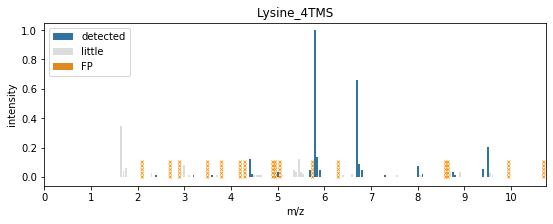


Spectrum C02 - detected peaks: 57
When matched to Lysine_4TMS: 23 matched ions with 0.92281020332912 total confidence
In this match, 22 peaks were not in library spectrum and 24 peaks from library spectrum were missing


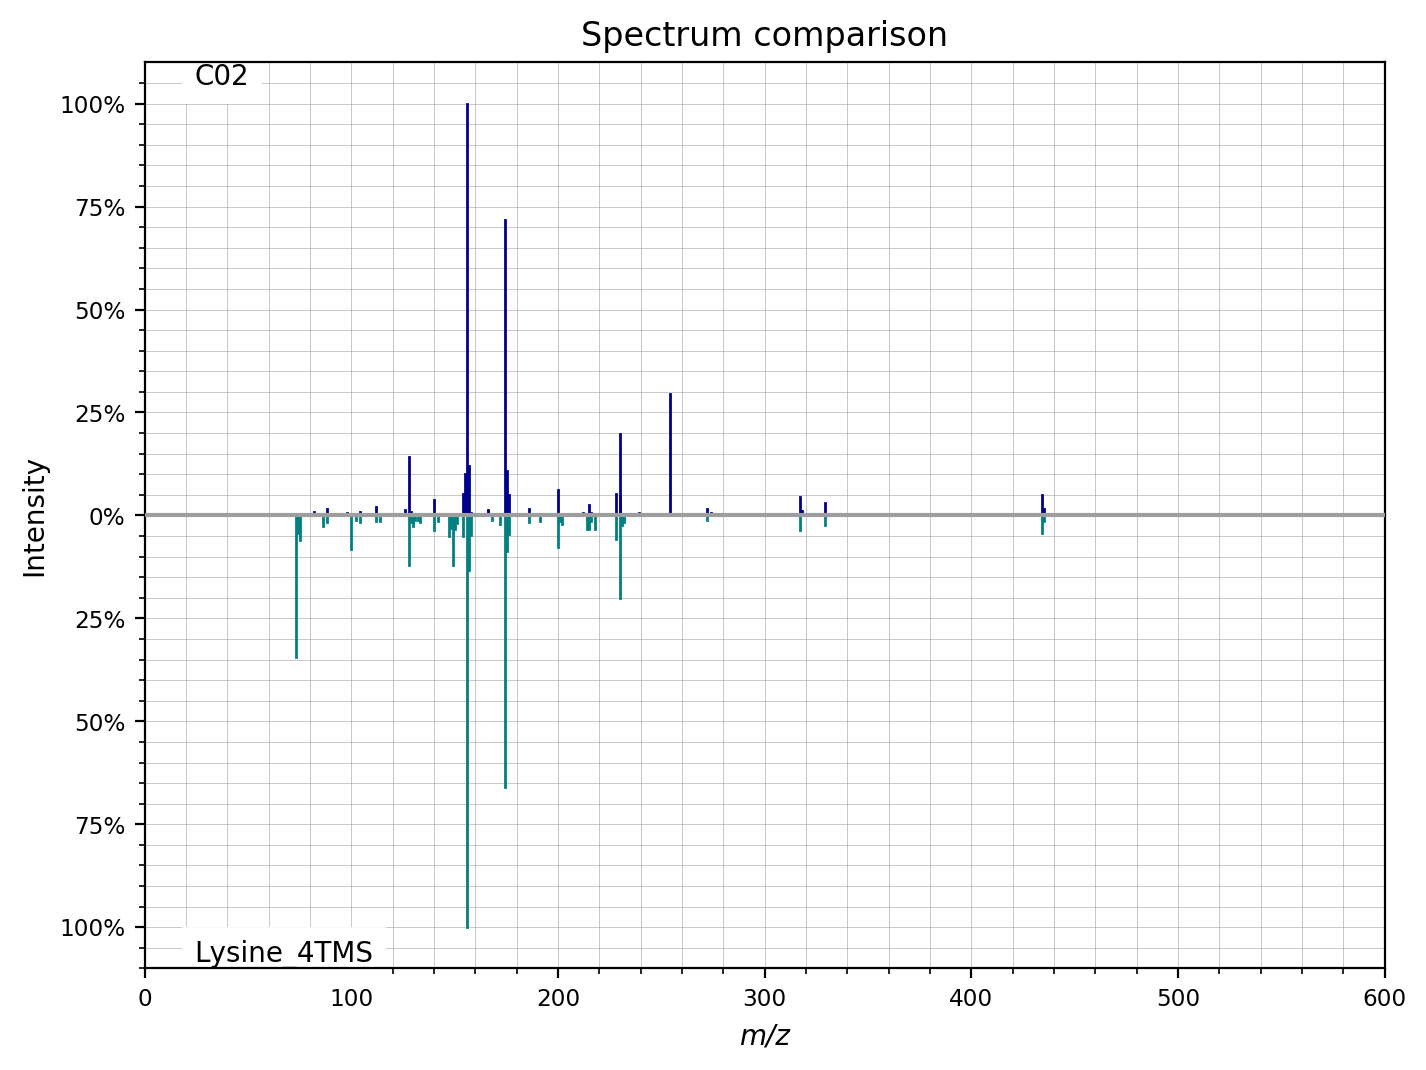

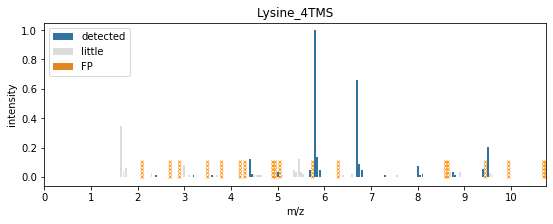

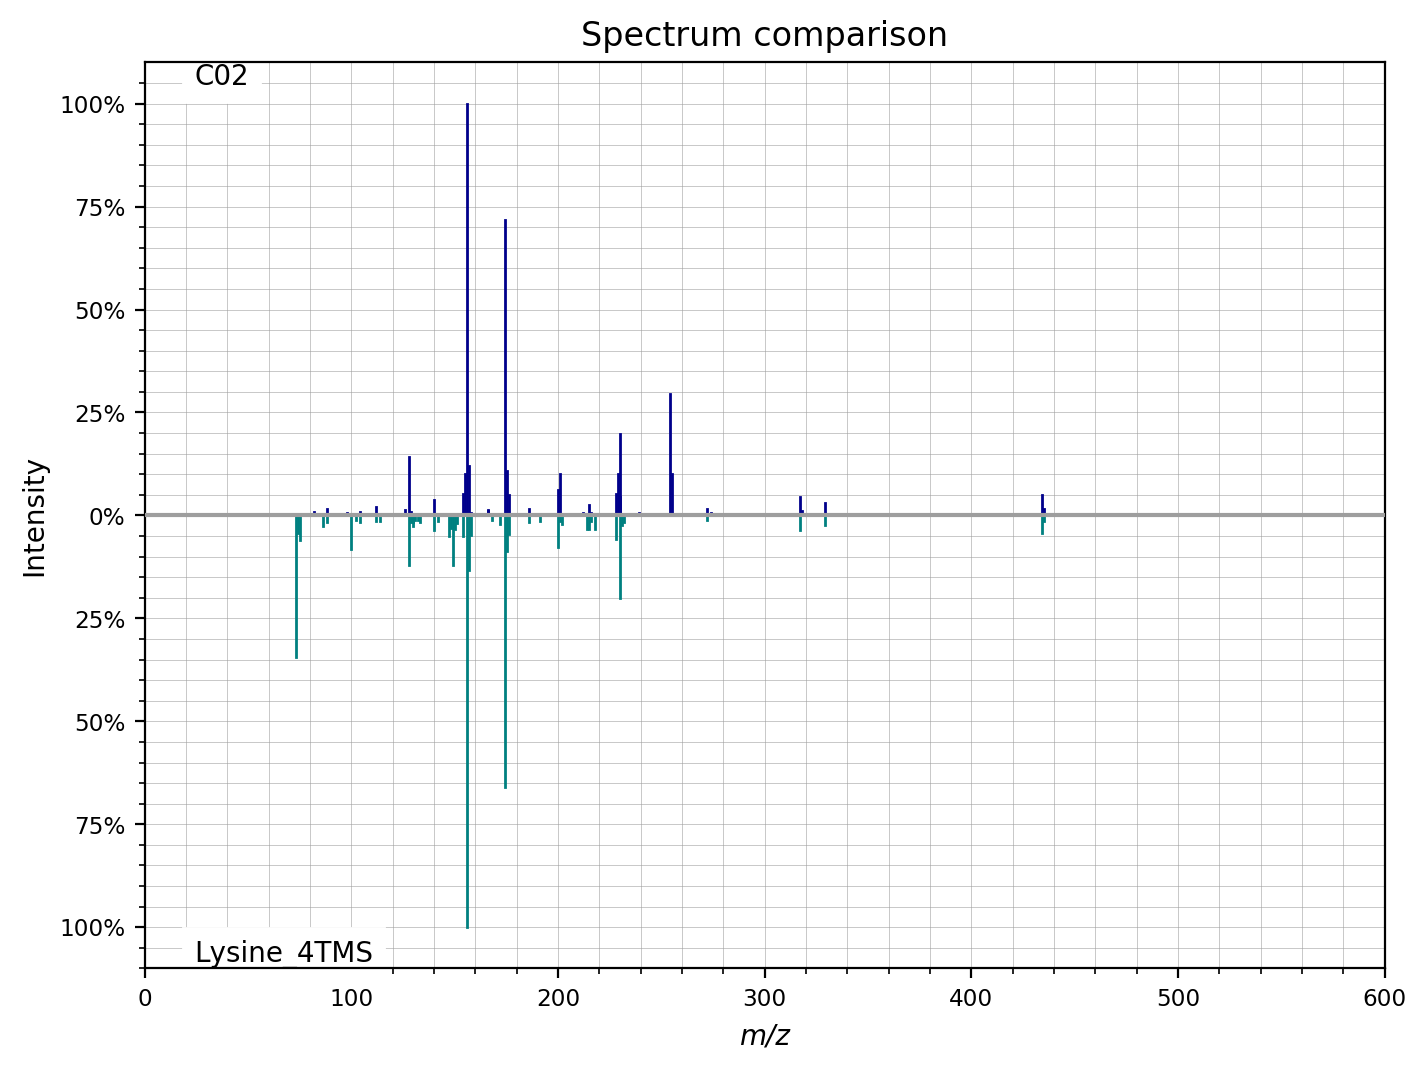

Spectrum C06 - detected peaks: 32
When matched to Fructose_5TMS isomer 2: 18 matched ions with 0.8766808769415186 total confidence
In this match, 12 peaks were not in library spectrum and 24 peaks from library spectrum were missing


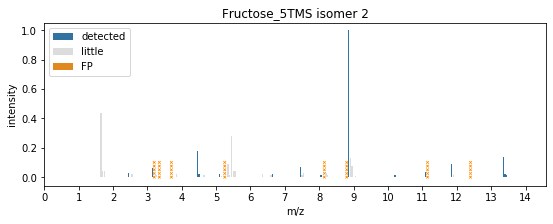


Spectrum C06 - detected peaks: 33
When matched to Fructose_5TMS isomer 2: 18 matched ions with 0.8766808769415186 total confidence
In this match, 12 peaks were not in library spectrum and 23 peaks from library spectrum were missing


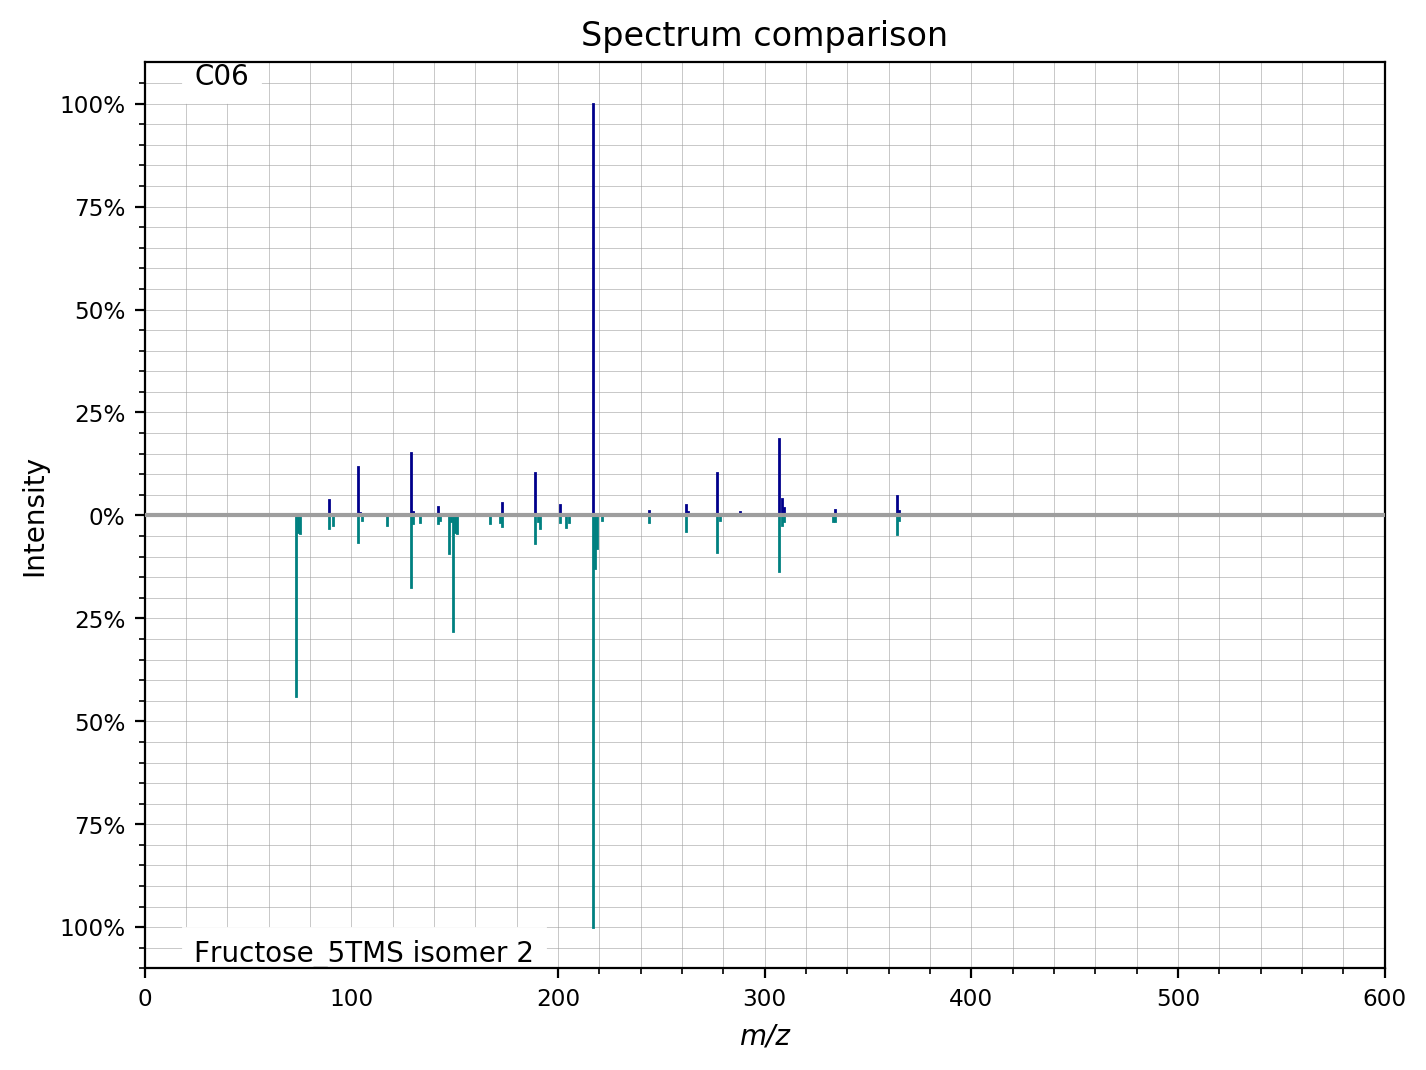

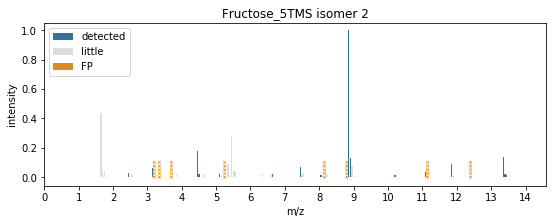

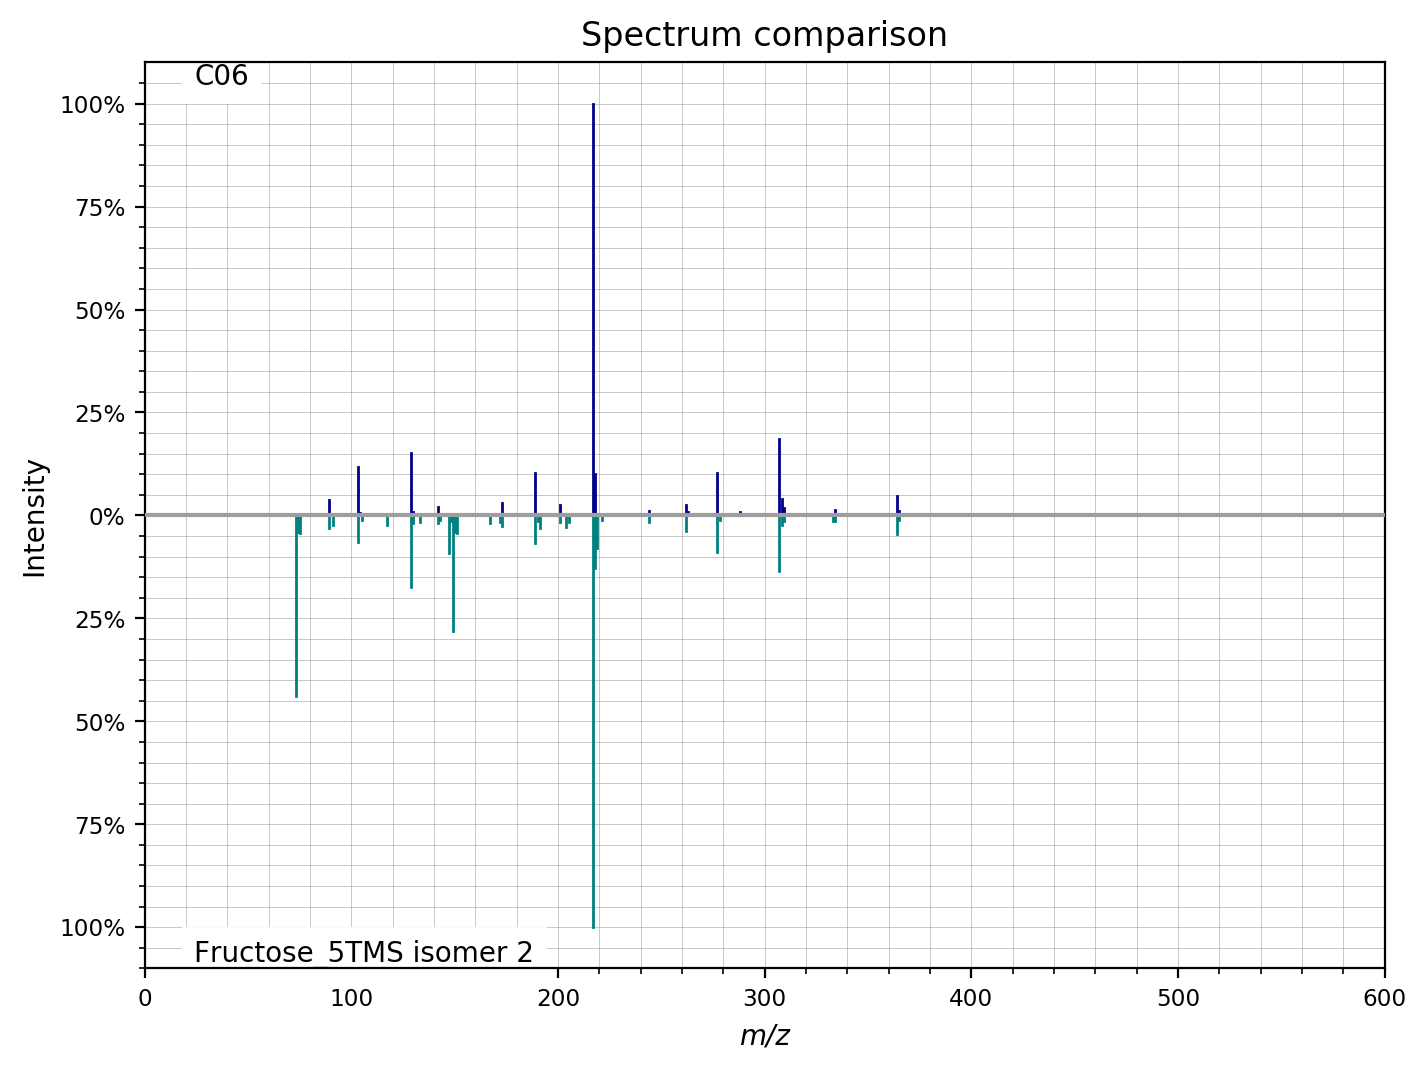

Spectrum C06 - detected peaks: 32
When matched to Fructose_5TMS isomer 1: 15 matched ions with 0.8584115640959713 total confidence
In this match, 14 peaks were not in library spectrum and 25 peaks from library spectrum were missing


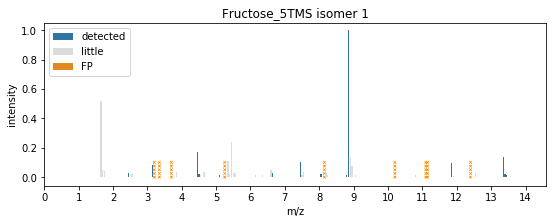


Spectrum C06 - detected peaks: 33
When matched to Fructose_5TMS isomer 1: 15 matched ions with 0.8584115640959713 total confidence
In this match, 14 peaks were not in library spectrum and 24 peaks from library spectrum were missing


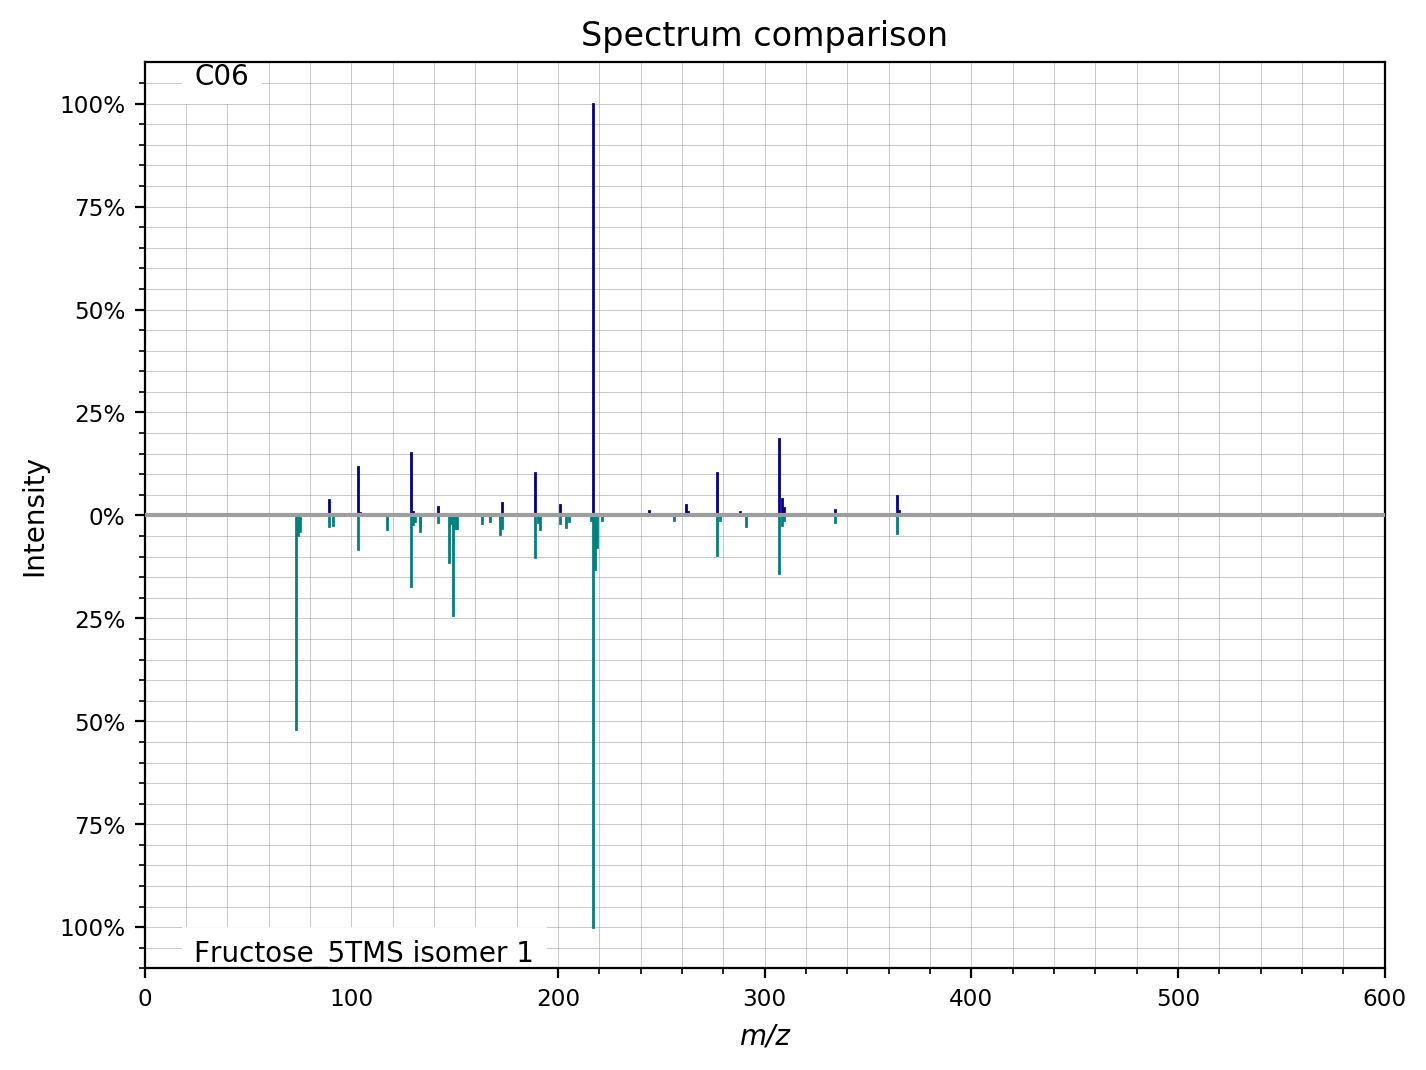

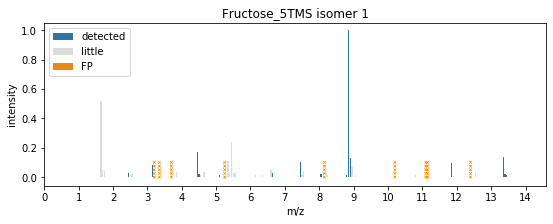

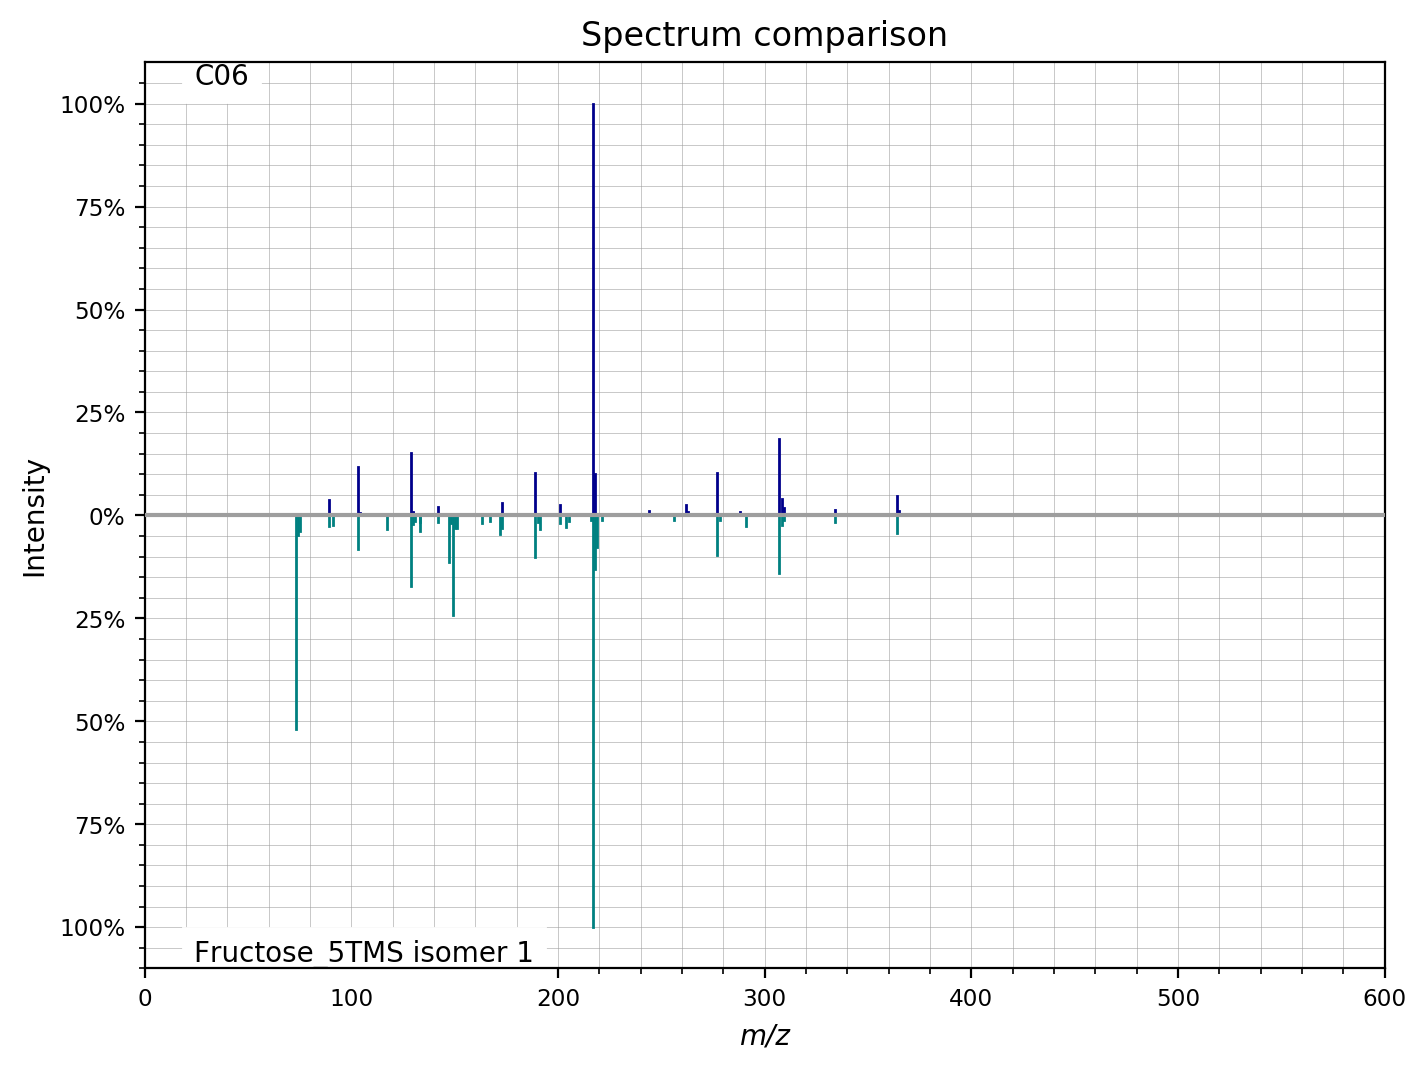

Spectrum C10 - detected peaks: 21
When matched to Myo-inositol_6TMS: 13 matched ions with 0.9155674896314296 total confidence
In this match, 7 peaks were not in library spectrum and 41 peaks from library spectrum were missing


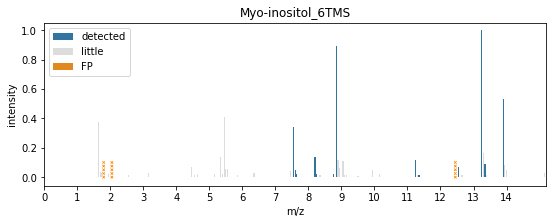


Spectrum C10 - detected peaks: 23
When matched to Myo-inositol_6TMS: 13 matched ions with 0.9155674896314296 total confidence
In this match, 7 peaks were not in library spectrum and 39 peaks from library spectrum were missing


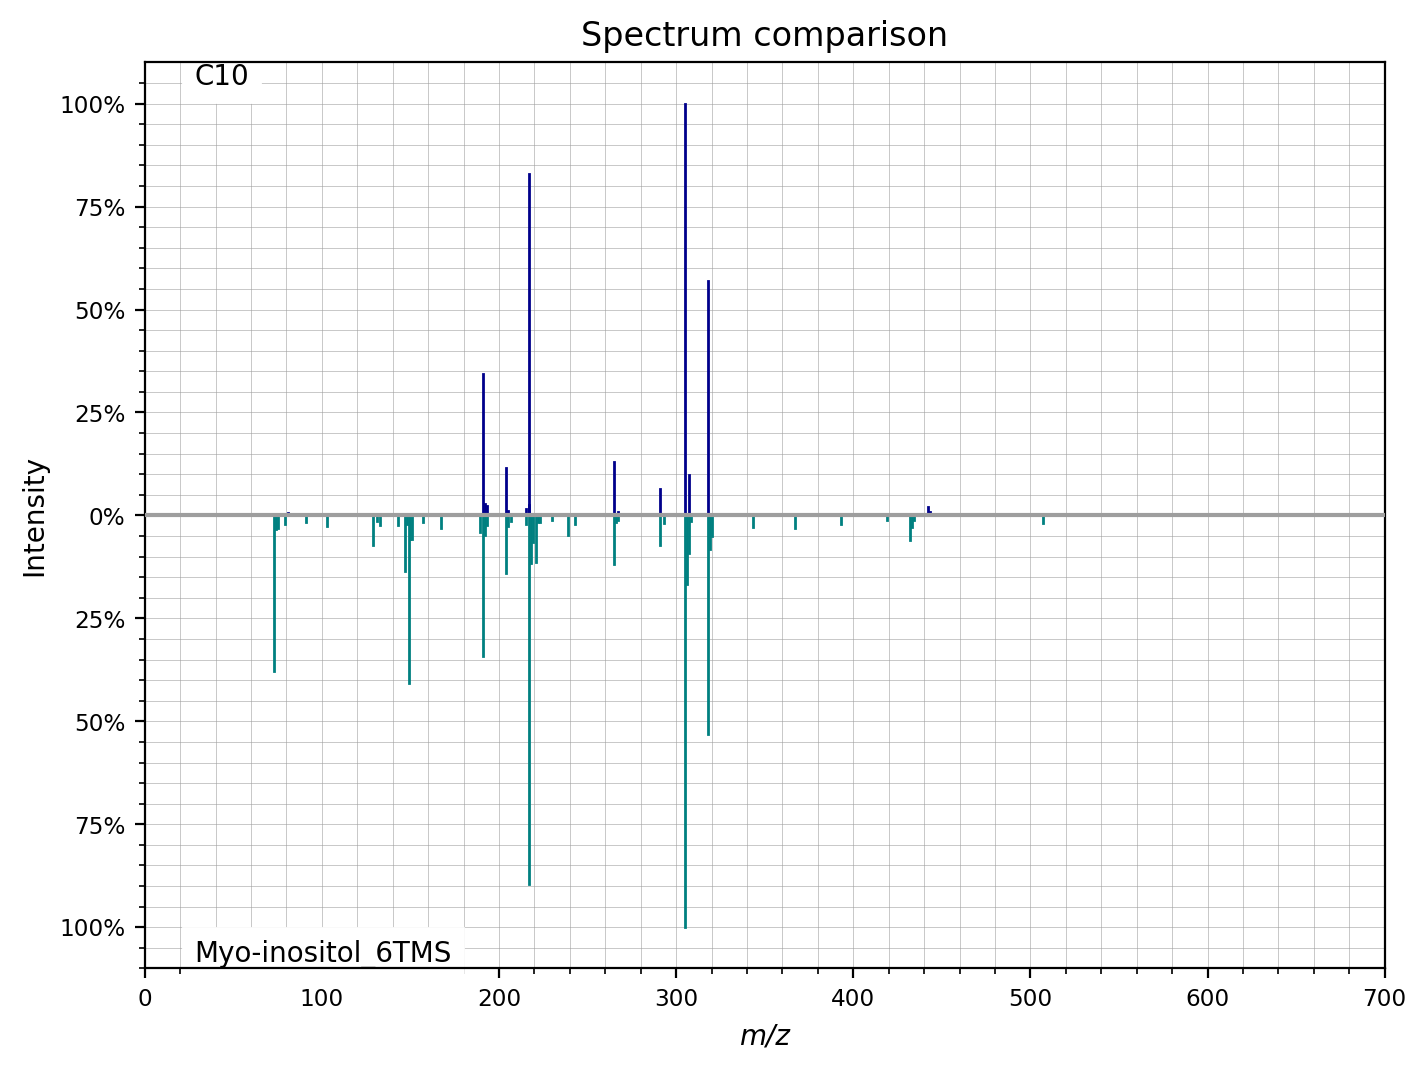

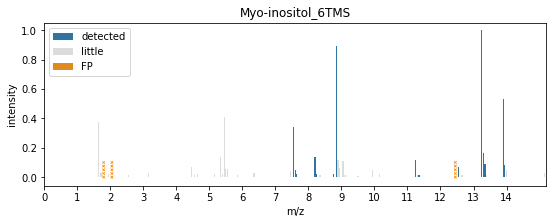

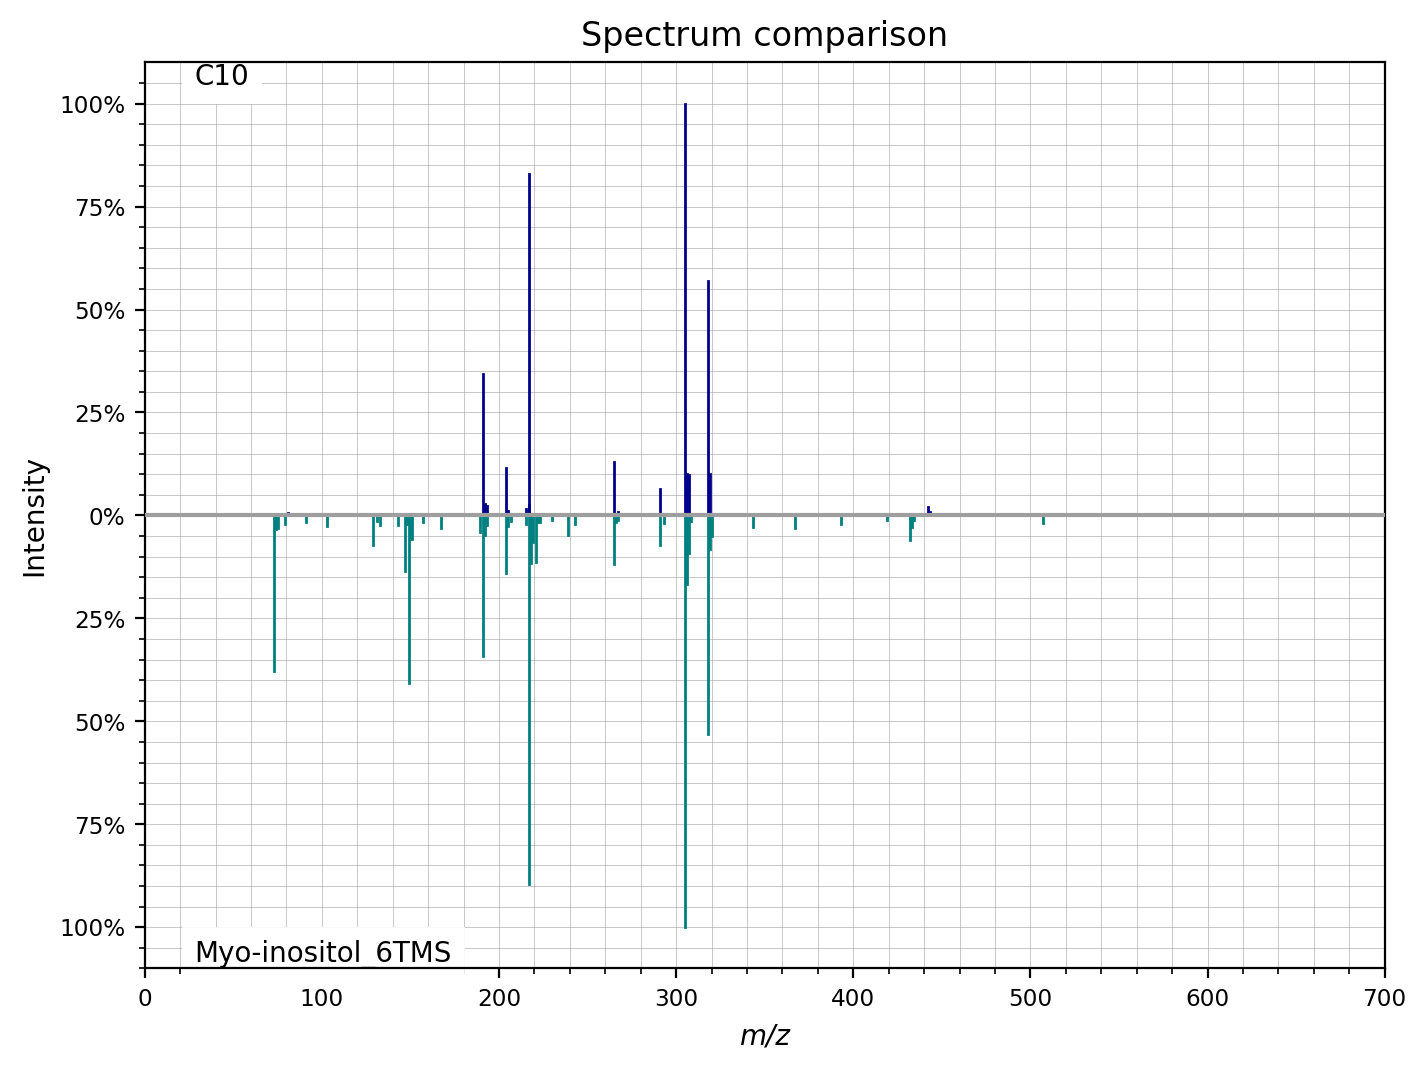

Spectrum C08 - detected peaks: 30
When matched to Citric acid_4TMS: 13 matched ions with 0.8749224326835099 total confidence
In this match, 15 peaks were not in library spectrum and 32 peaks from library spectrum were missing


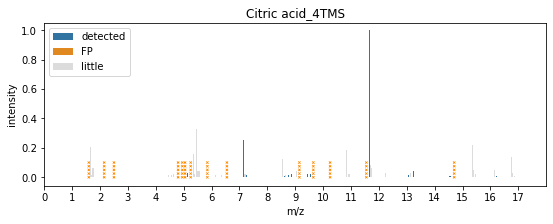


Spectrum C08 - detected peaks: 31
When matched to Citric acid_4TMS: 13 matched ions with 0.8749224326835099 total confidence
In this match, 15 peaks were not in library spectrum and 31 peaks from library spectrum were missing


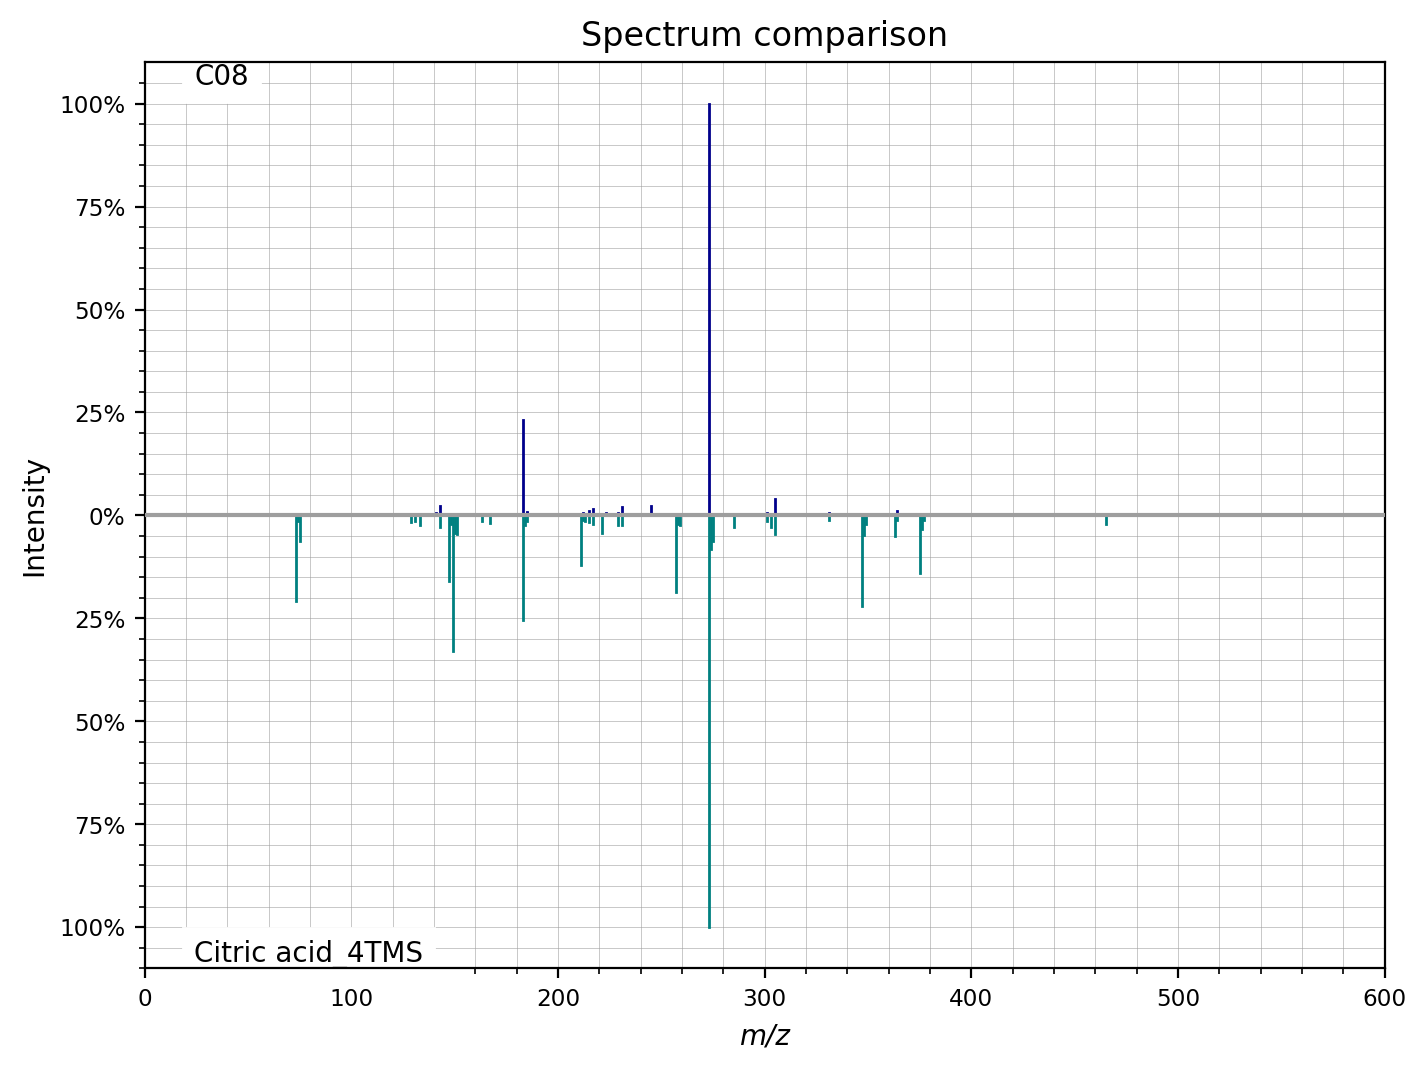

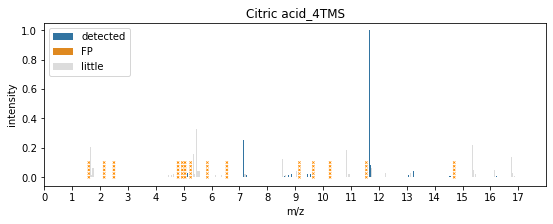

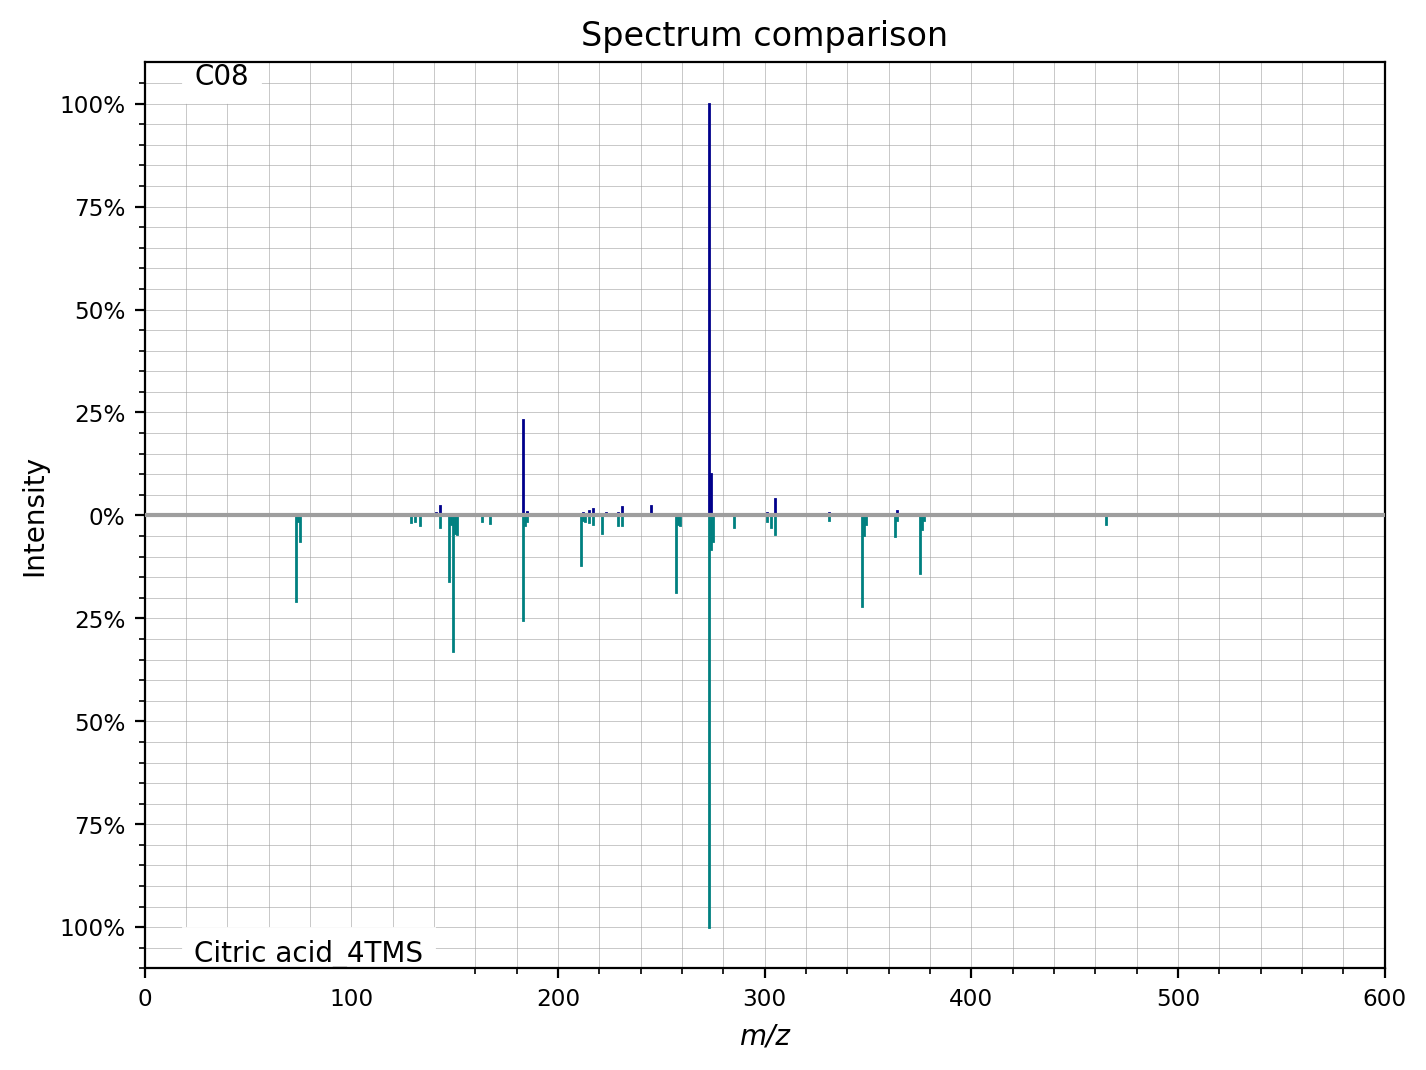

Spectrum C16 - detected peaks: 14
When matched to Uridine_4TMS isomer 1: 12 matched ions with 0.6025062983867928 total confidence
In this match, 0 peaks were not in library spectrum and 75 peaks from library spectrum were missing


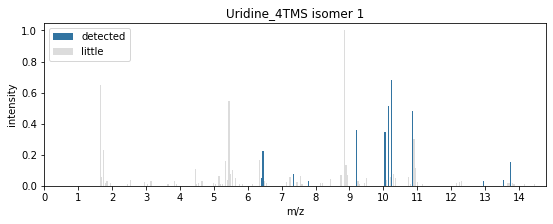


Spectrum C16 - detected peaks: 18
When matched to Uridine_4TMS isomer 1: 12 matched ions with 0.6025062983867928 total confidence
In this match, 1 peaks were not in library spectrum and 72 peaks from library spectrum were missing


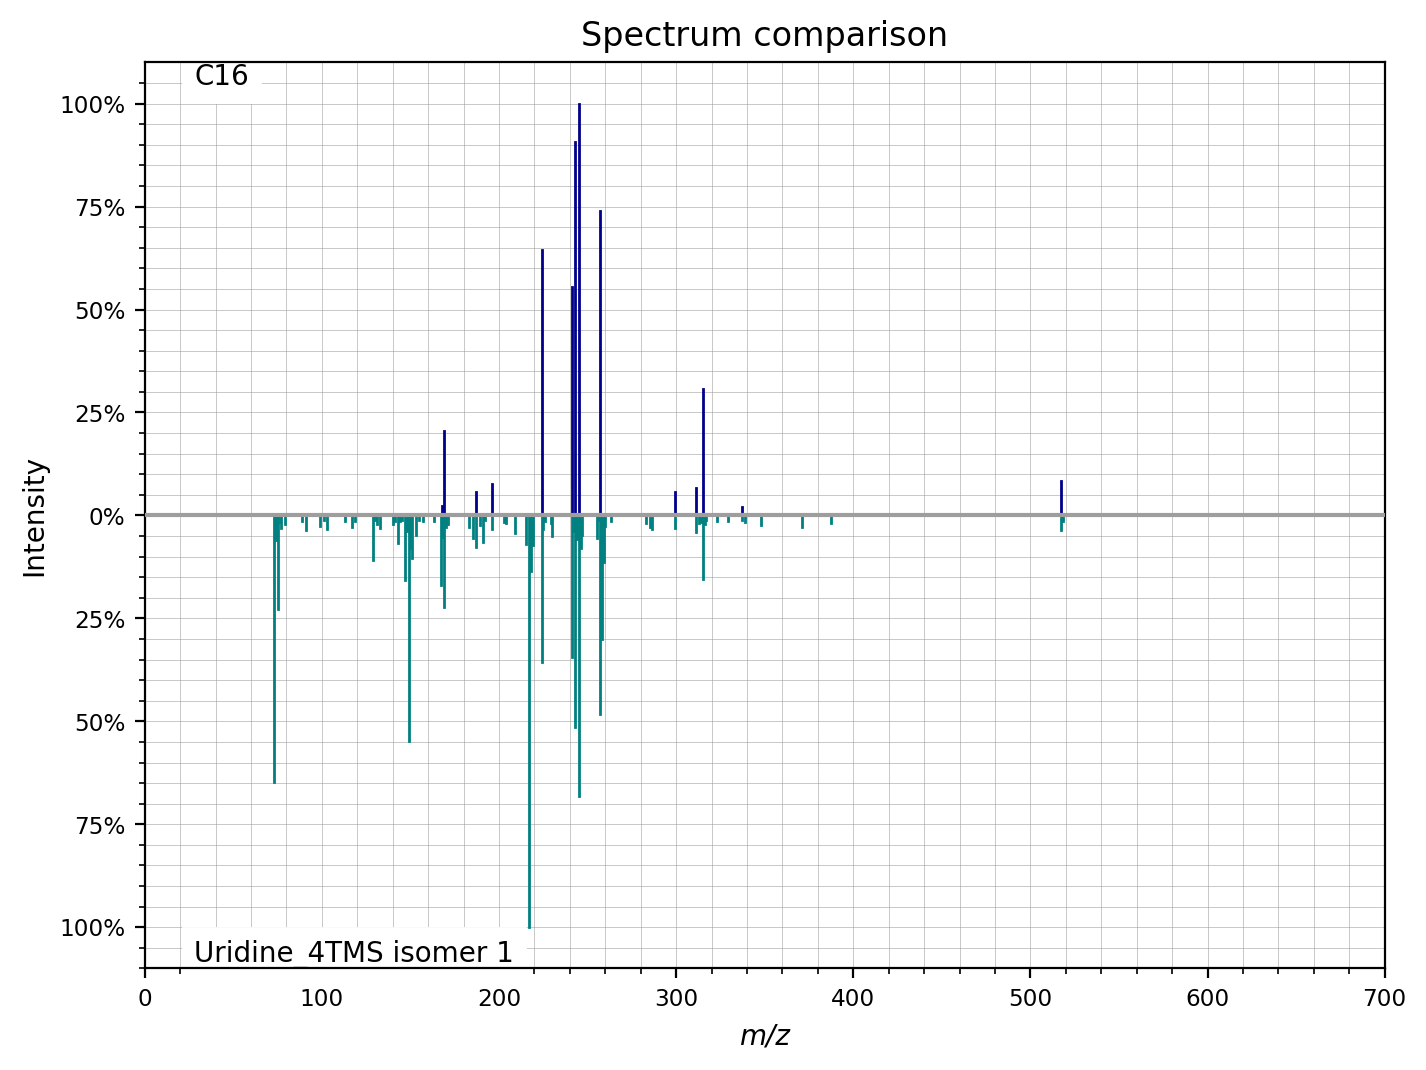

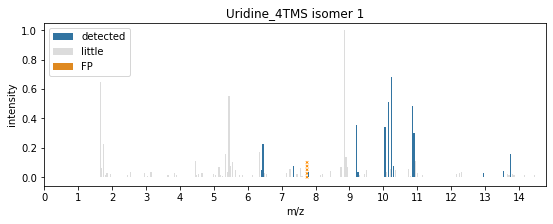

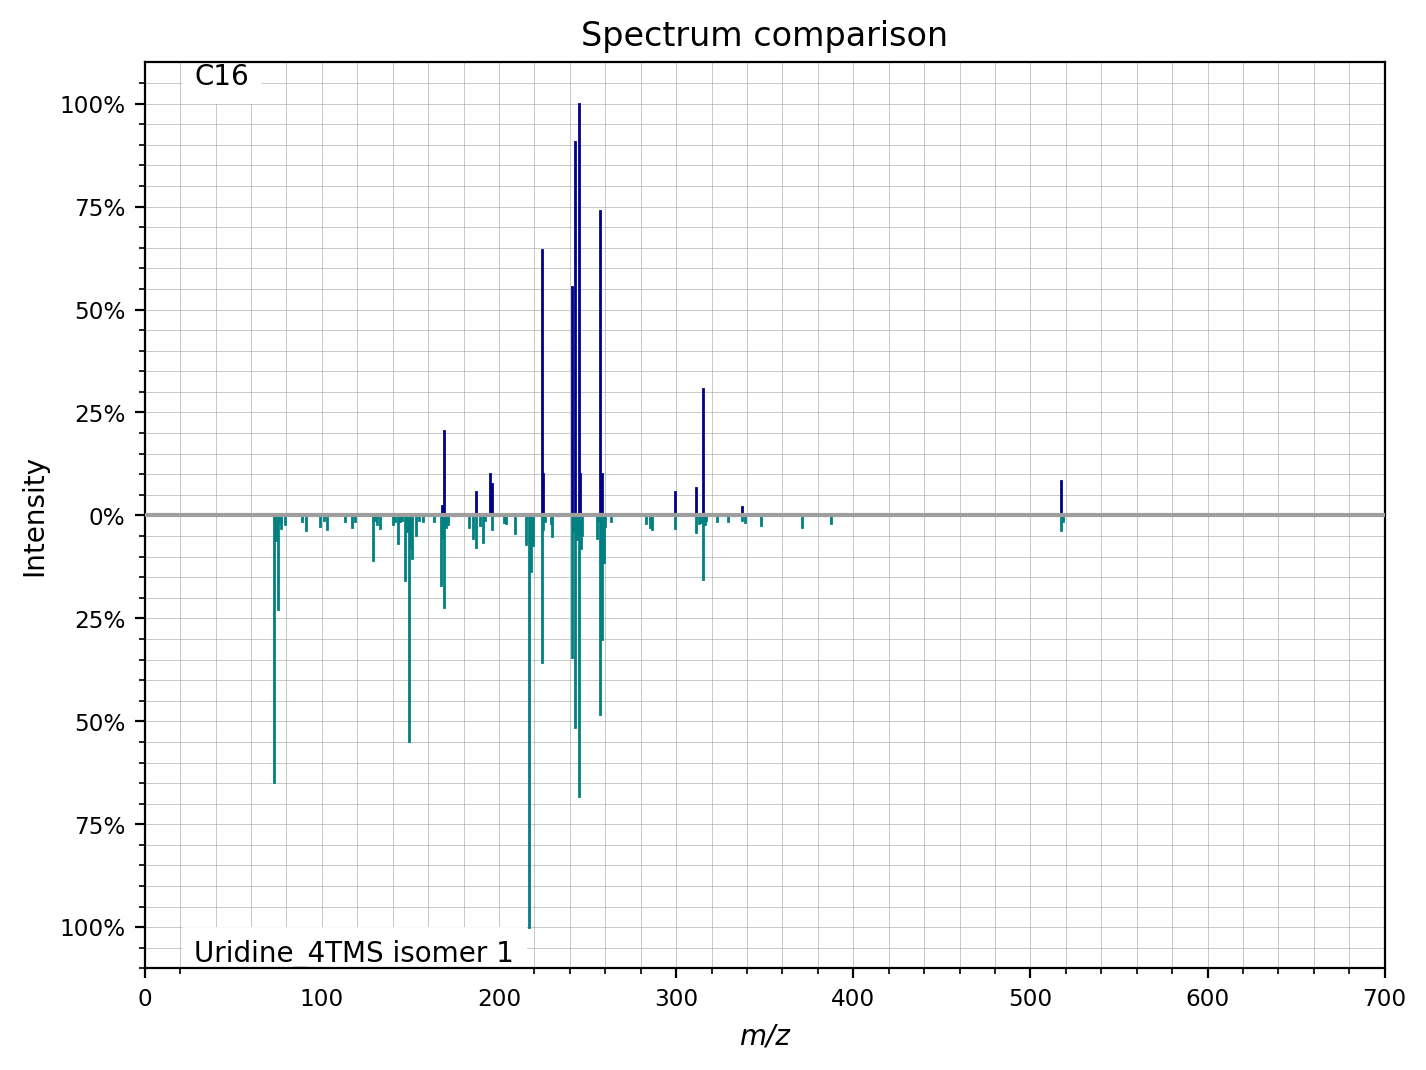

Spectrum C06 - detected peaks: 32
When matched to Xylose_4TMS: 11 matched ions with 0.8140434072629077 total confidence
In this match, 18 peaks were not in library spectrum and 29 peaks from library spectrum were missing


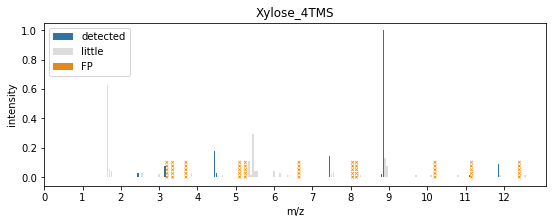


Spectrum C06 - detected peaks: 33
When matched to Xylose_4TMS: 11 matched ions with 0.8140434072629077 total confidence
In this match, 18 peaks were not in library spectrum and 28 peaks from library spectrum were missing


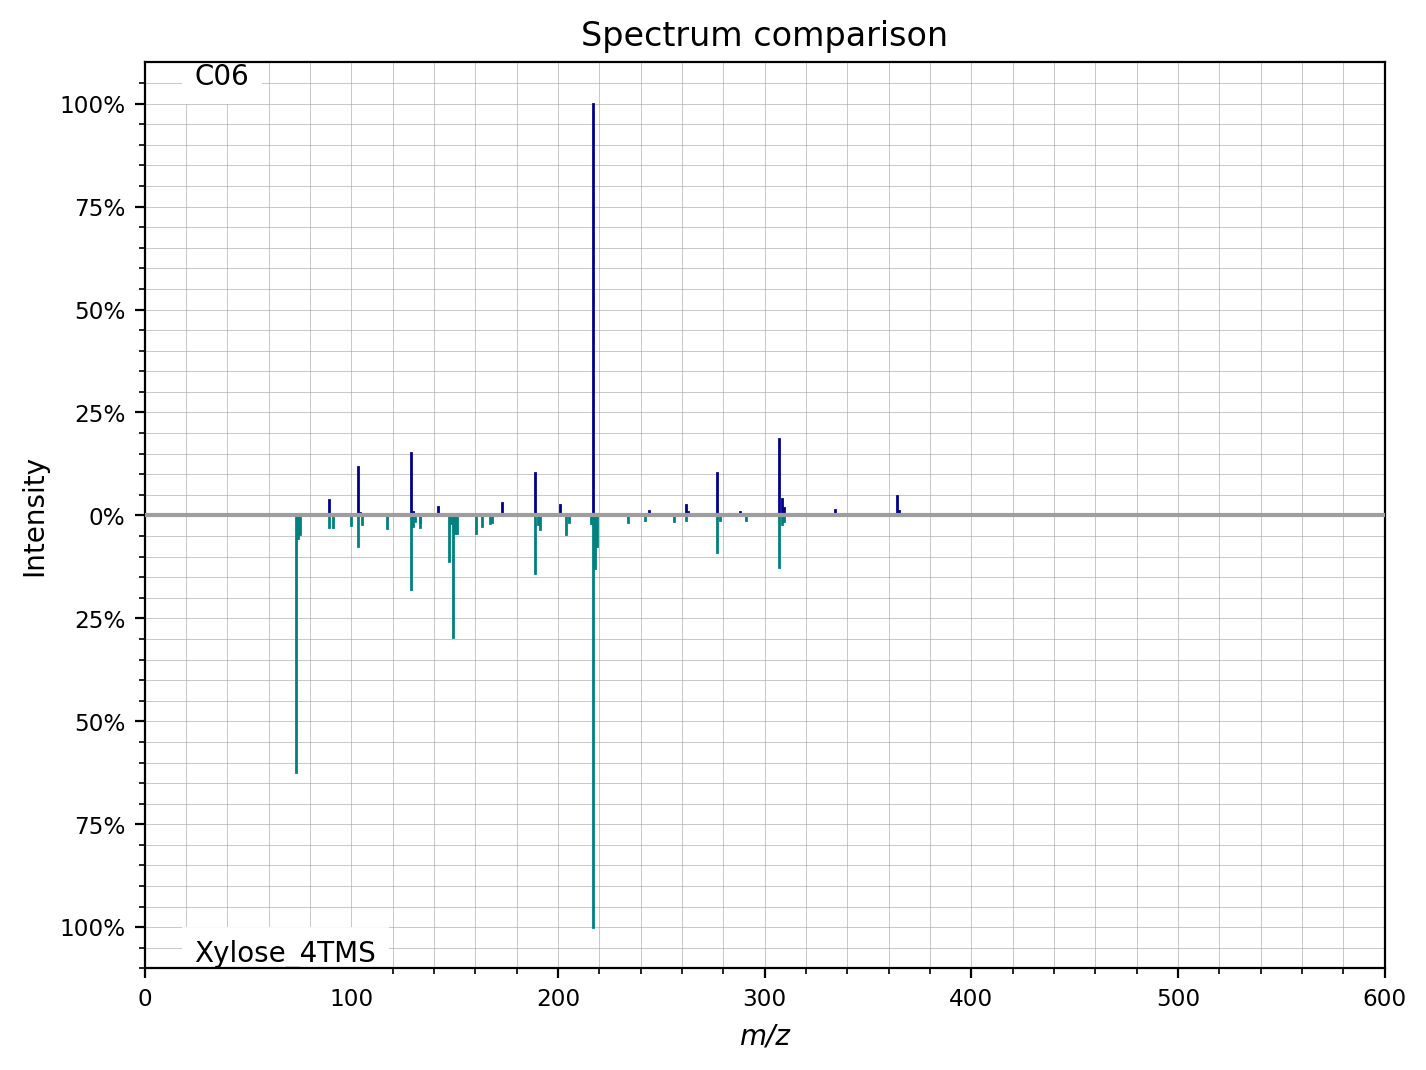

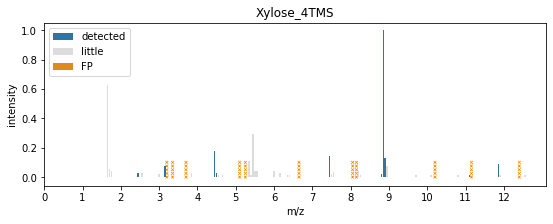

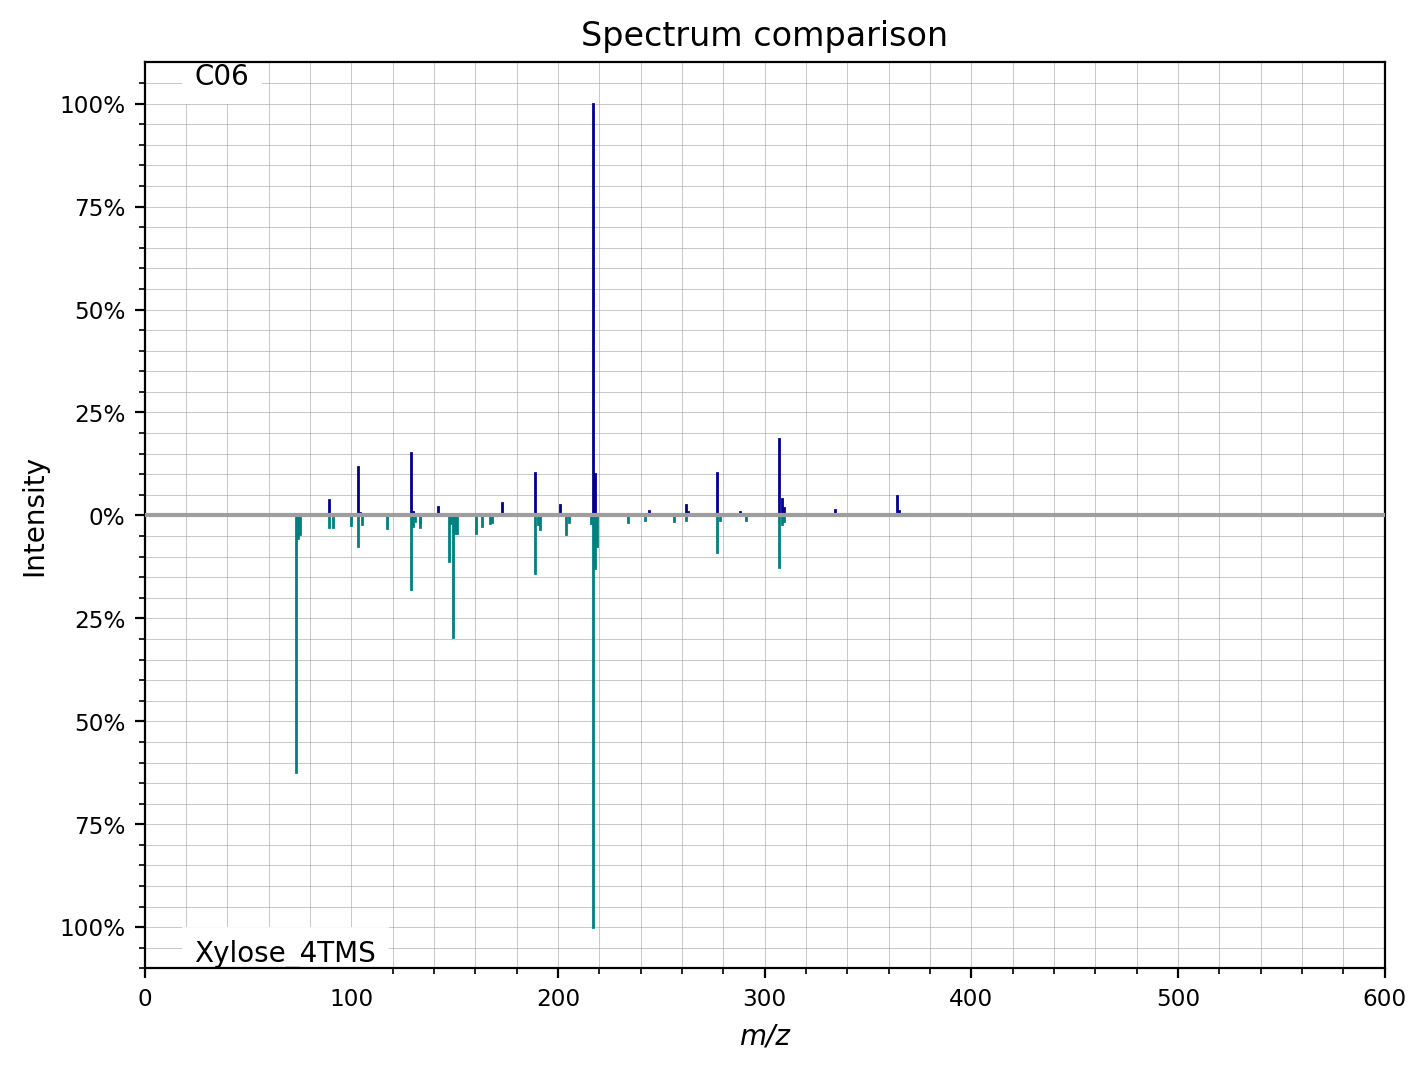

Spectrum C06 - detected peaks: 32
When matched to Ribose_4TMS: 11 matched ions with 0.8566412457759247 total confidence
In this match, 17 peaks were not in library spectrum and 24 peaks from library spectrum were missing


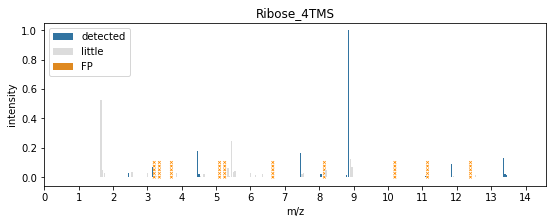


Spectrum C06 - detected peaks: 33
When matched to Ribose_4TMS: 11 matched ions with 0.8566412457759247 total confidence
In this match, 17 peaks were not in library spectrum and 23 peaks from library spectrum were missing


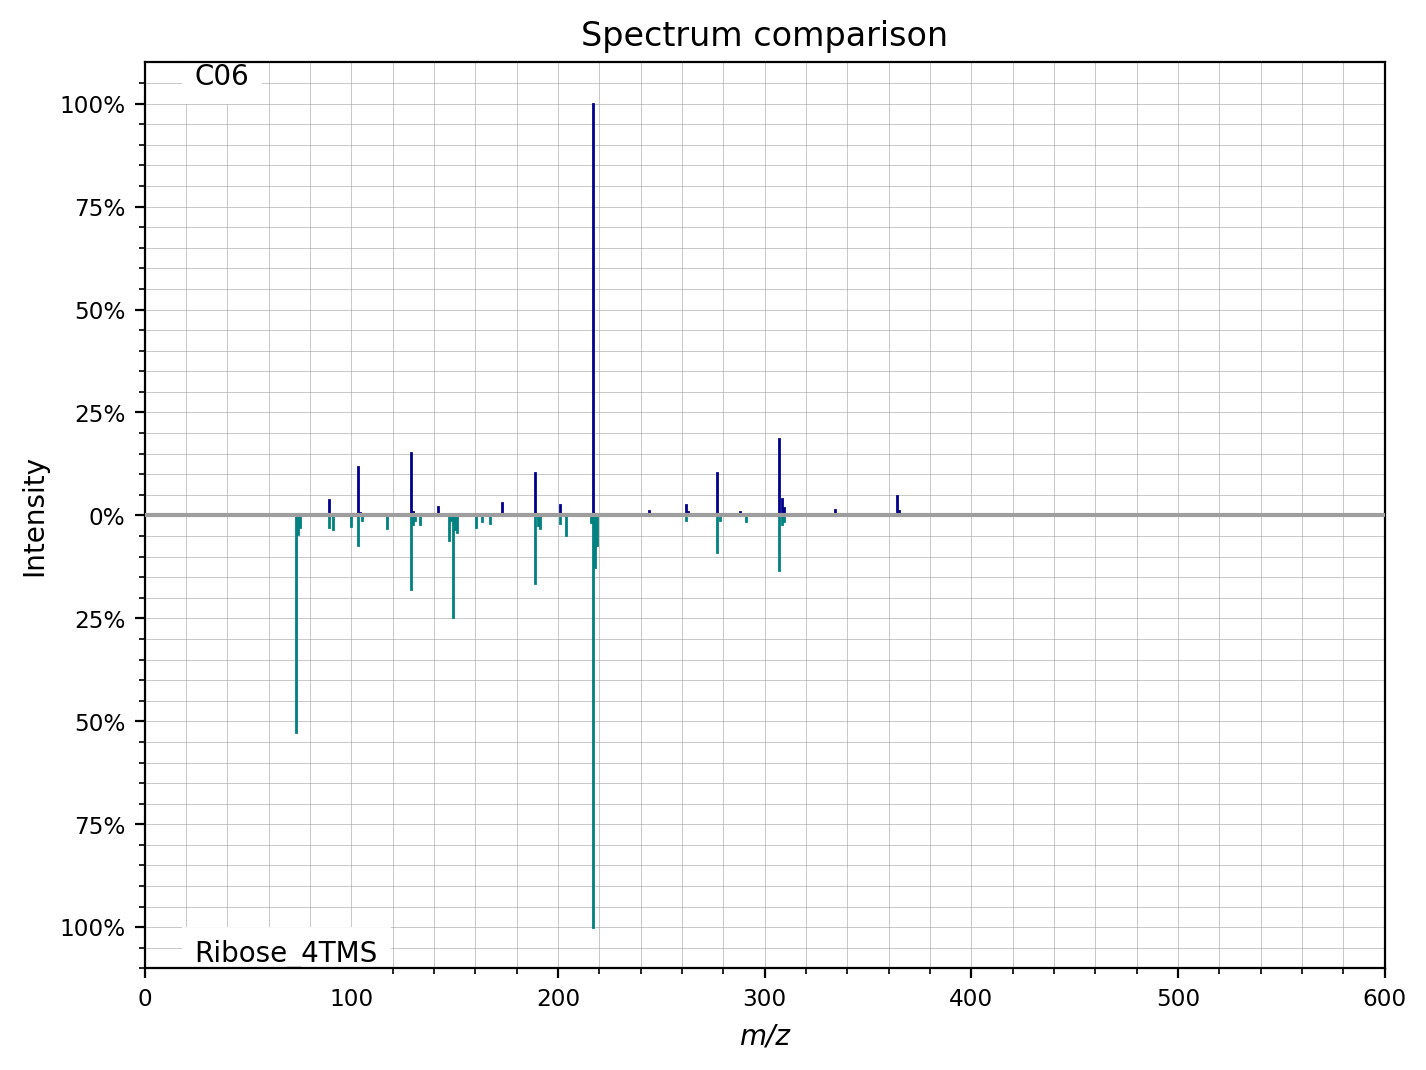

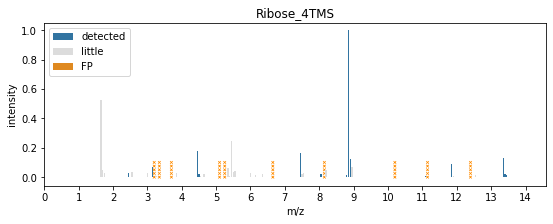

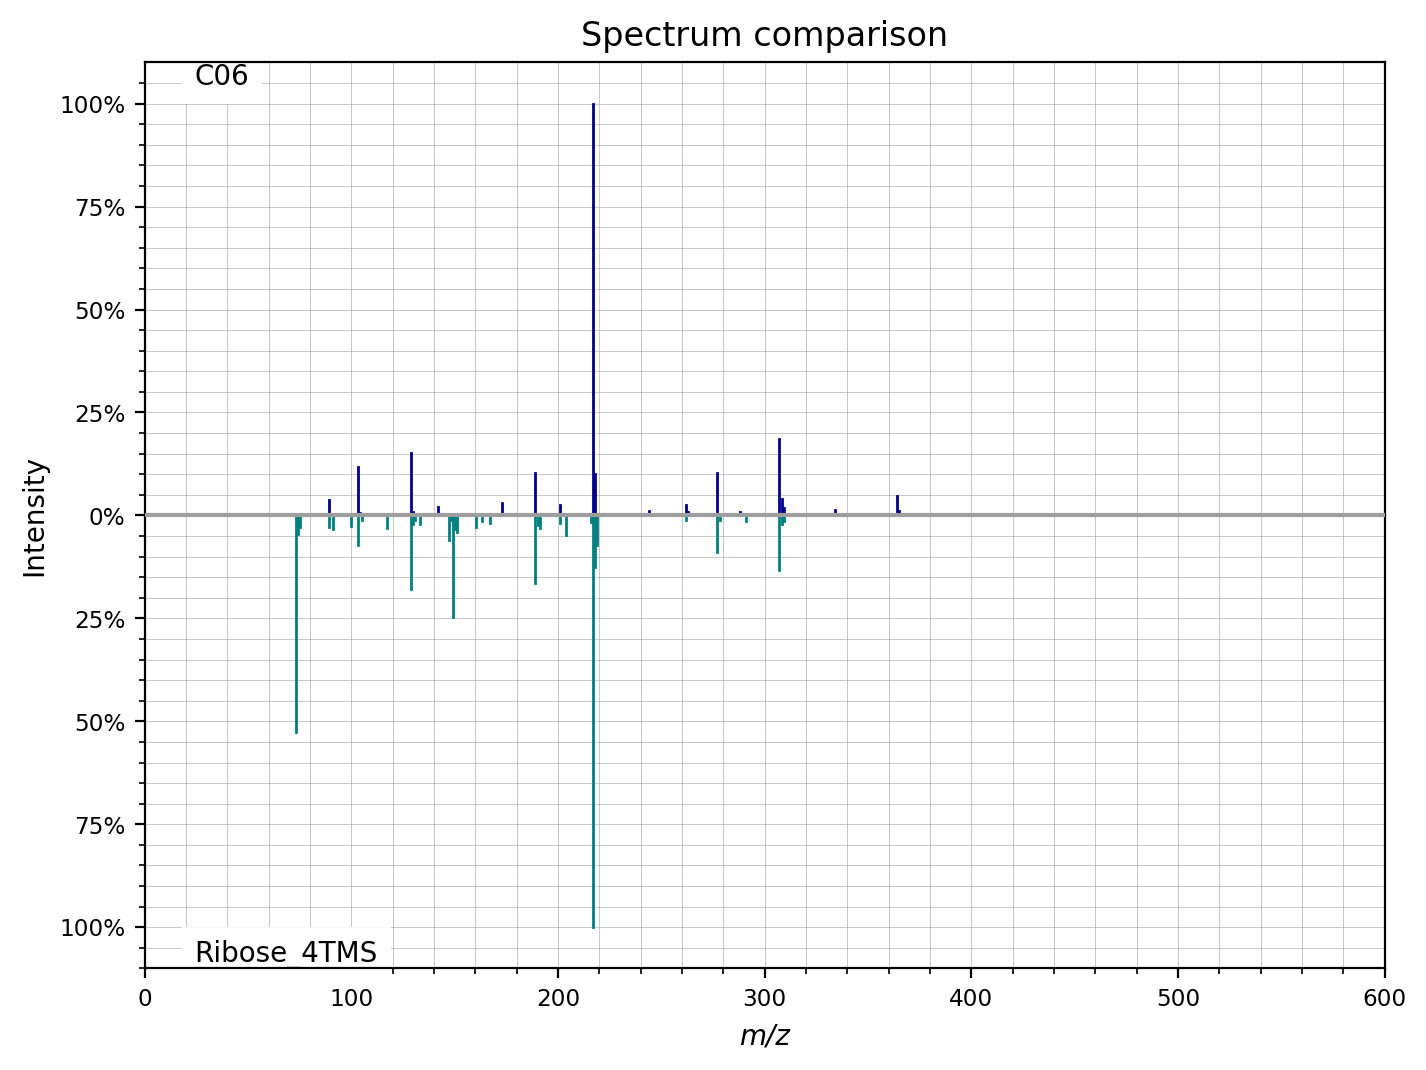

Spectrum C06 - detected peaks: 32
When matched to Arabitol_5TMS: 10 matched ions with 0.7972294938455029 total confidence
In this match, 20 peaks were not in library spectrum and 33 peaks from library spectrum were missing


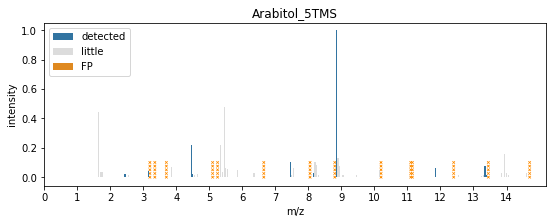


Spectrum C06 - detected peaks: 33
When matched to Arabitol_5TMS: 10 matched ions with 0.7972294938455029 total confidence
In this match, 20 peaks were not in library spectrum and 32 peaks from library spectrum were missing


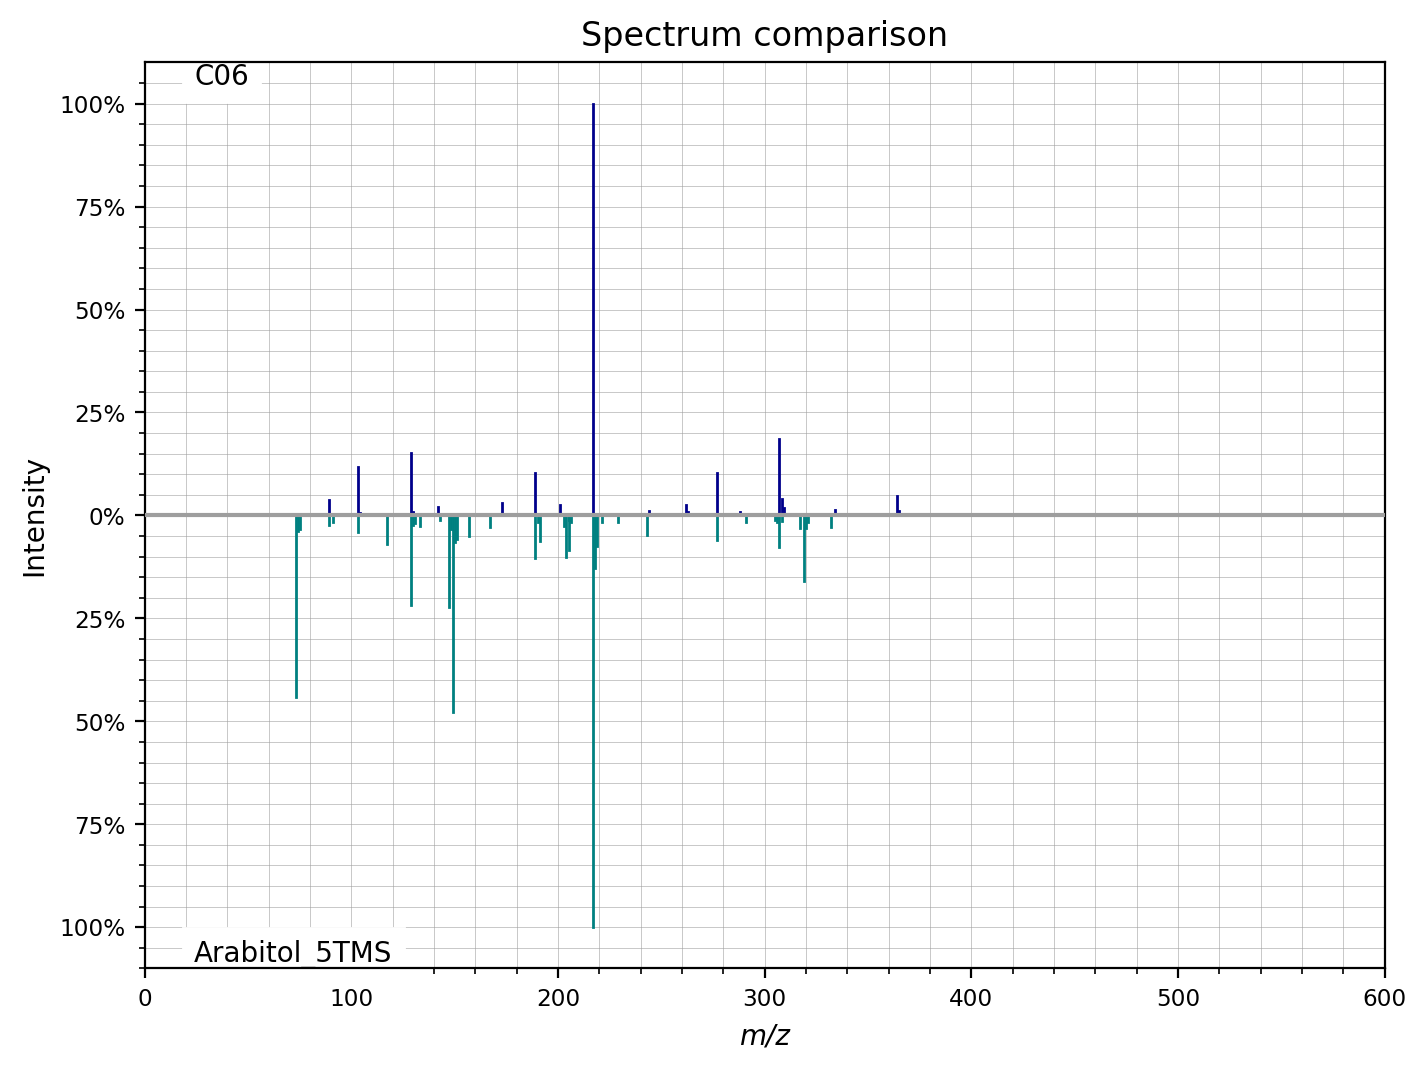

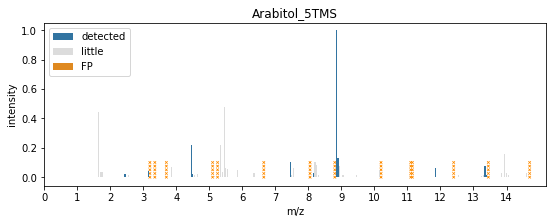

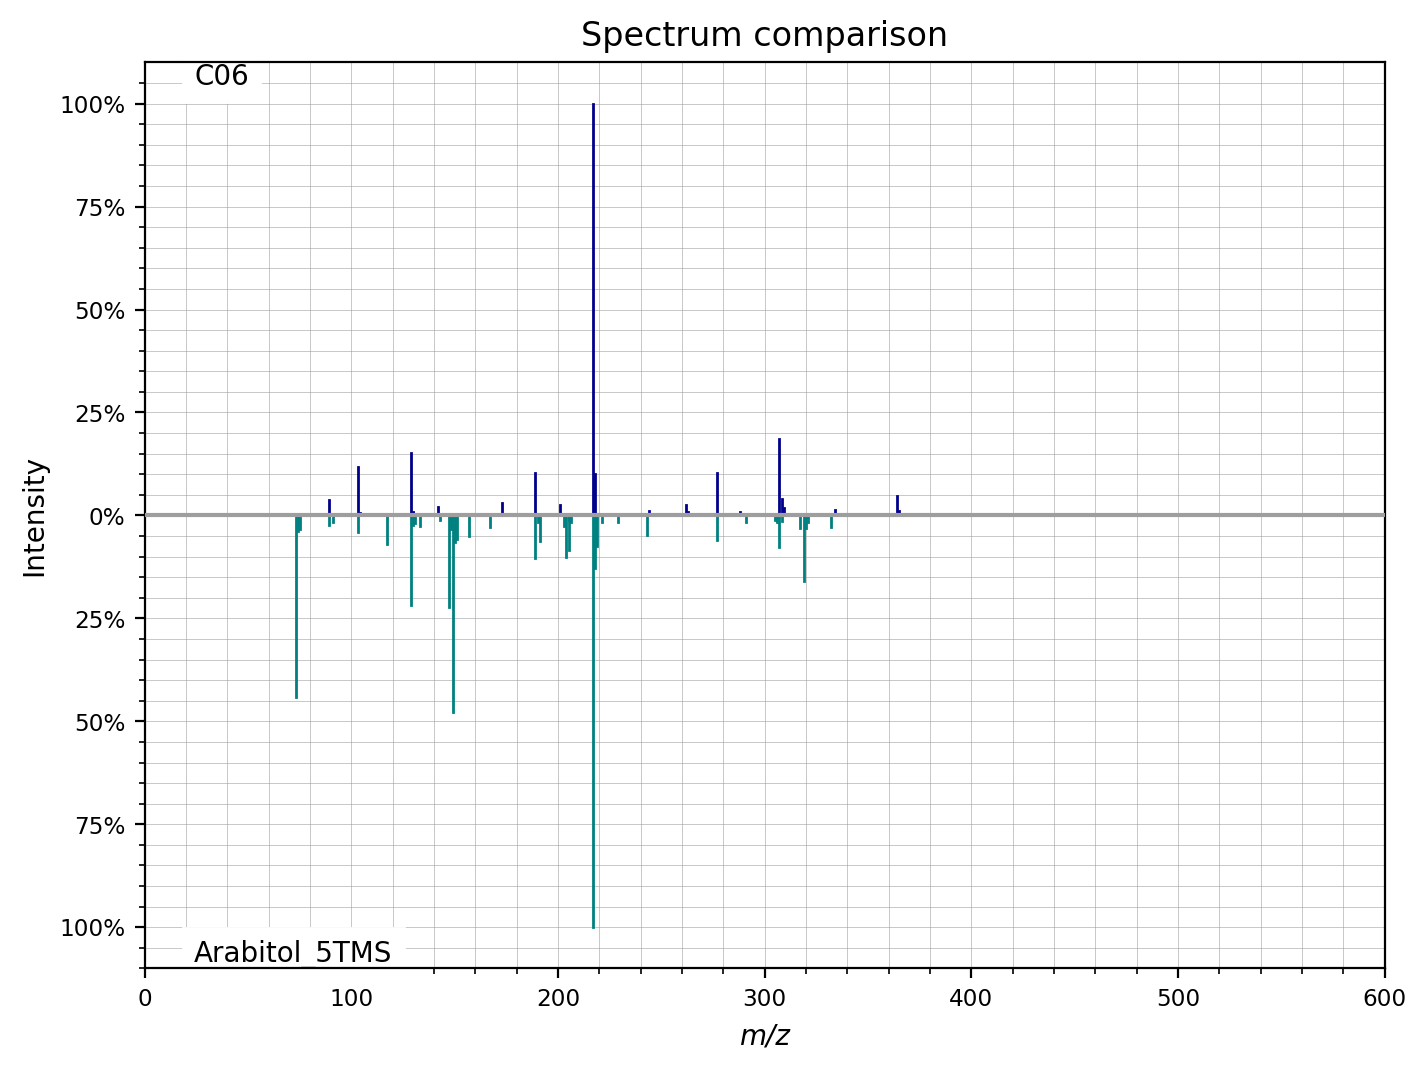

Spectrum C06 - detected peaks: 32
When matched to Arabitol_5TMS: 10 matched ions with 0.796552247937575 total confidence
In this match, 20 peaks were not in library spectrum and 33 peaks from library spectrum were missing


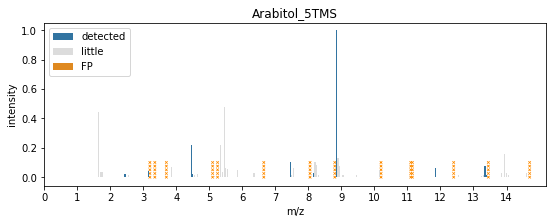


Spectrum C06 - detected peaks: 33
When matched to Arabitol_5TMS: 10 matched ions with 0.796552247937575 total confidence
In this match, 20 peaks were not in library spectrum and 32 peaks from library spectrum were missing


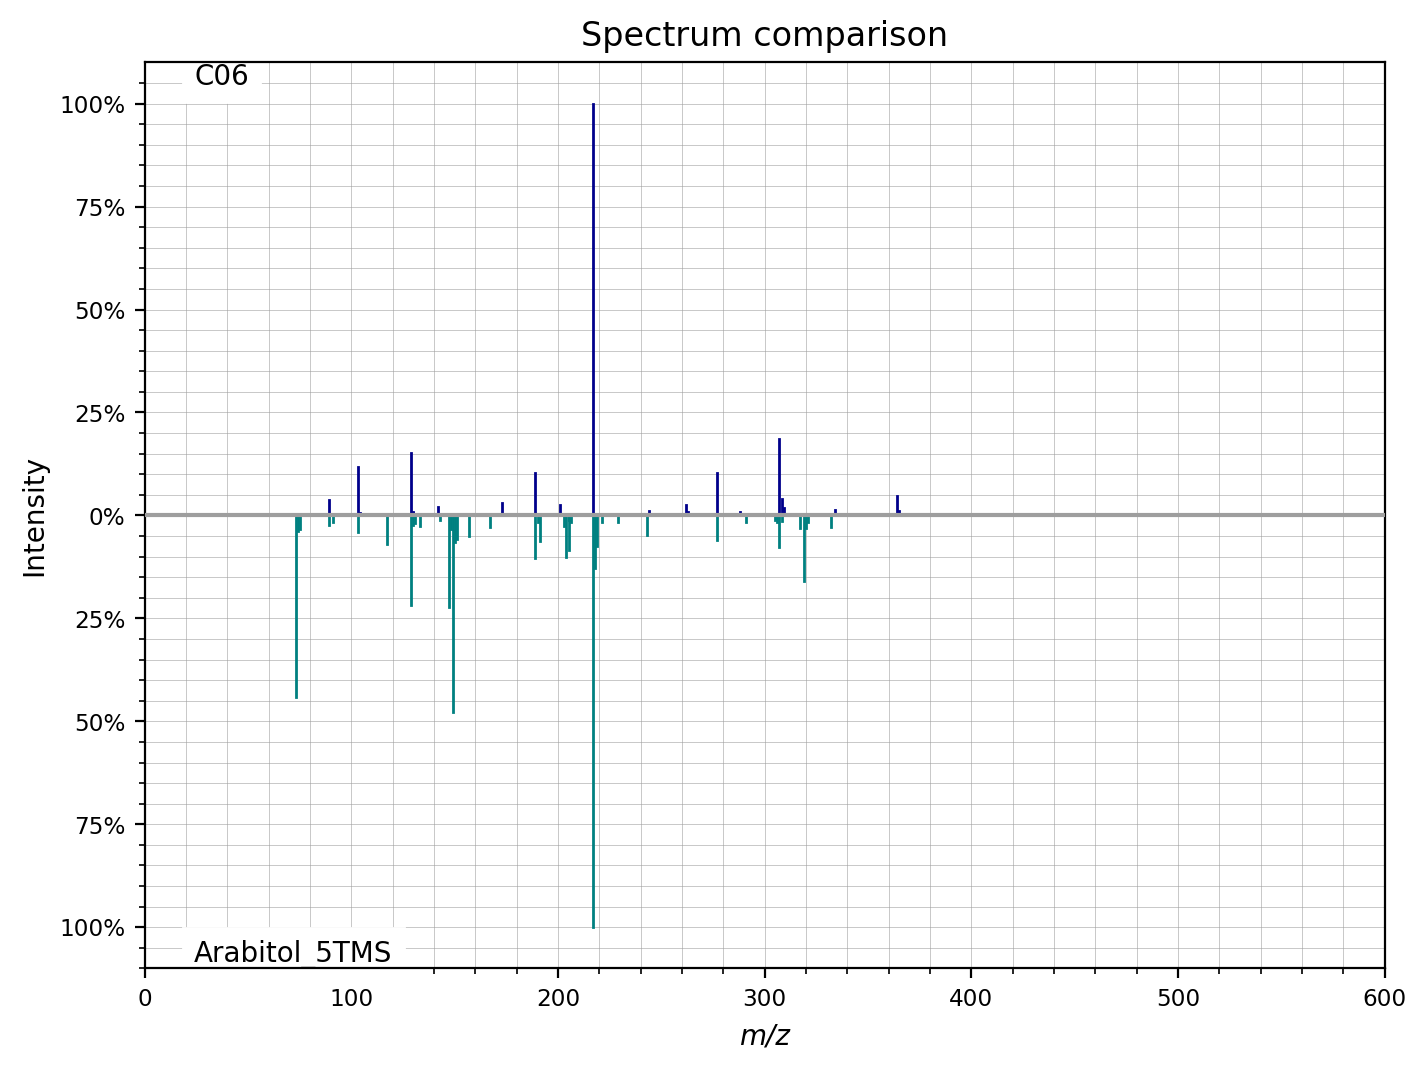

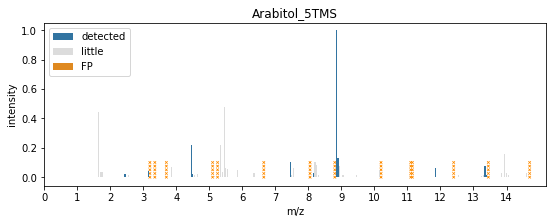

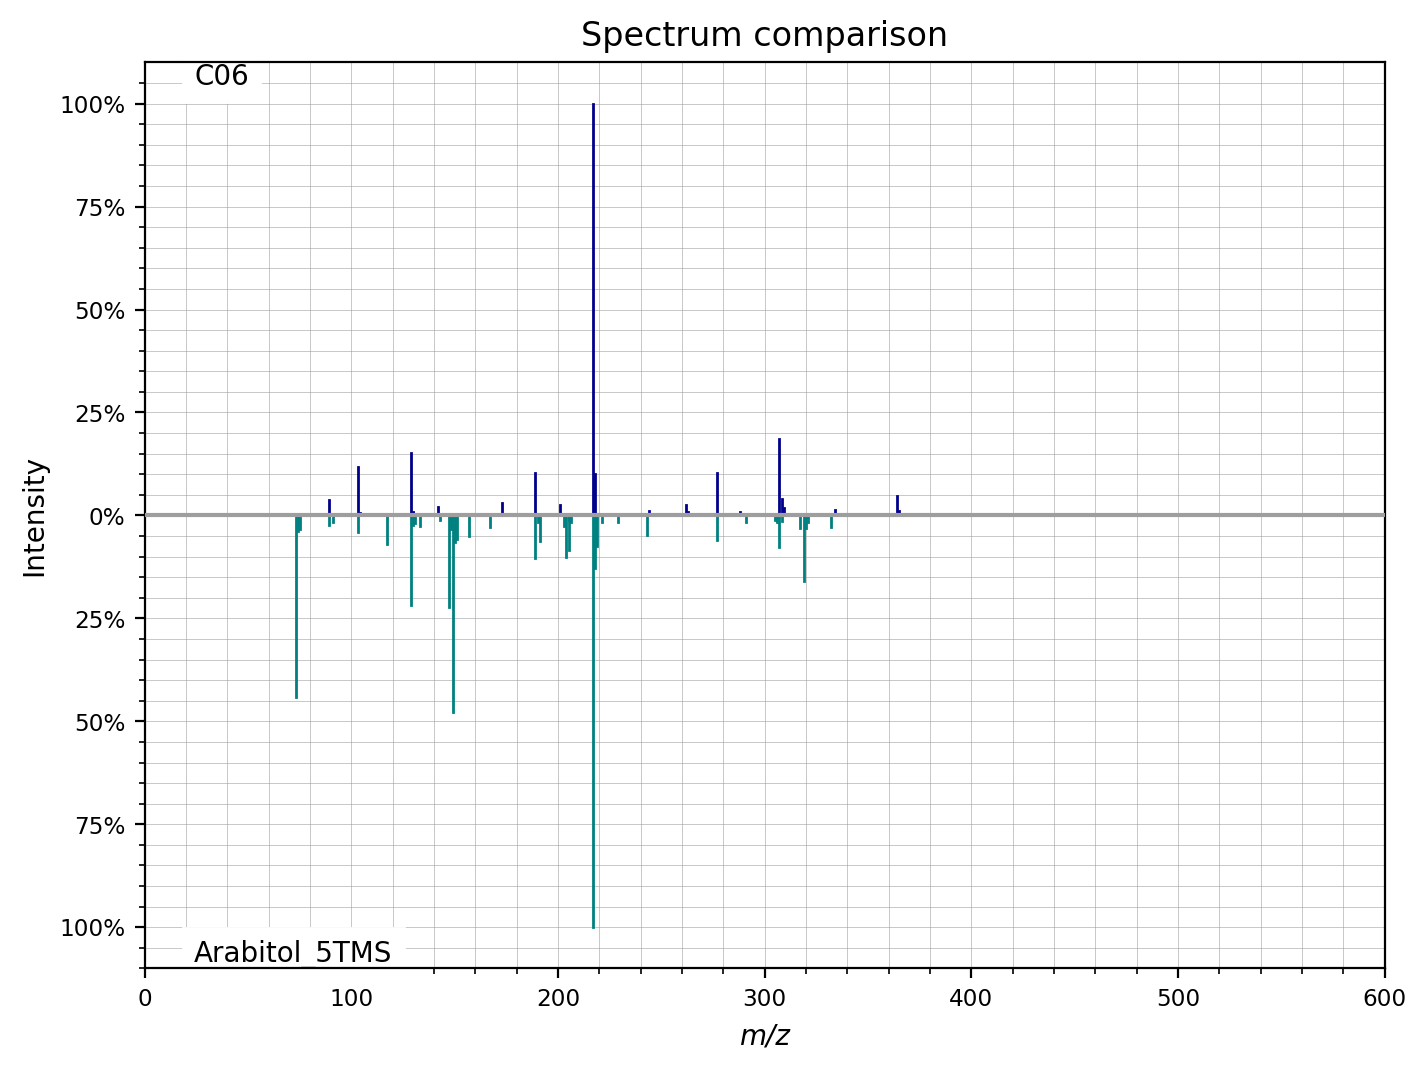

Spectrum C06 - detected peaks: 32
When matched to Arabitol_5TMS: 9 matched ions with 0.7972294938455029 total confidence
In this match, 20 peaks were not in library spectrum and 33 peaks from library spectrum were missing


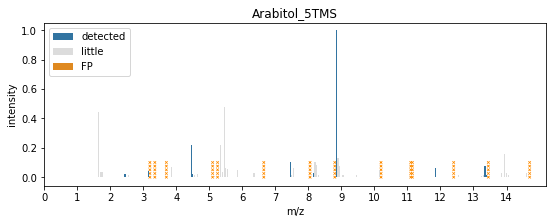


Spectrum C06 - detected peaks: 33
When matched to Arabitol_5TMS: 9 matched ions with 0.7972294938455029 total confidence
In this match, 20 peaks were not in library spectrum and 32 peaks from library spectrum were missing


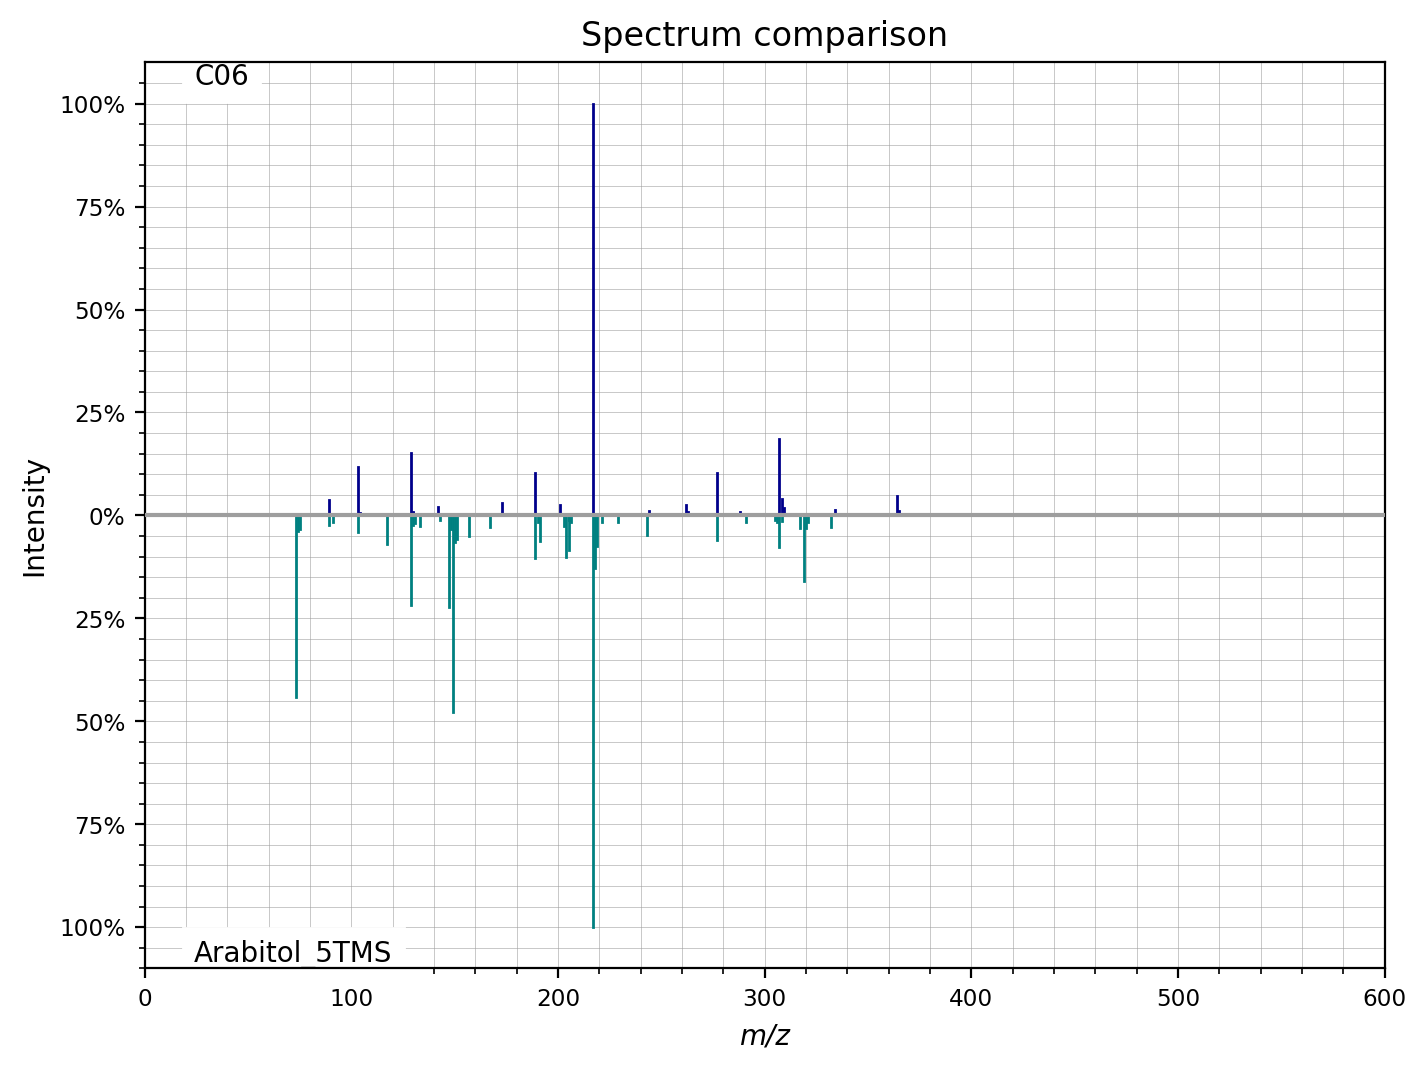

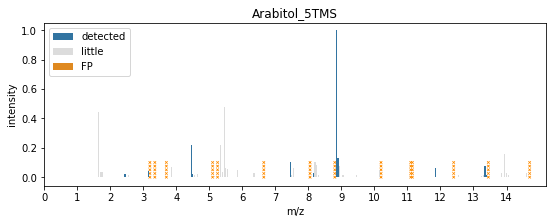

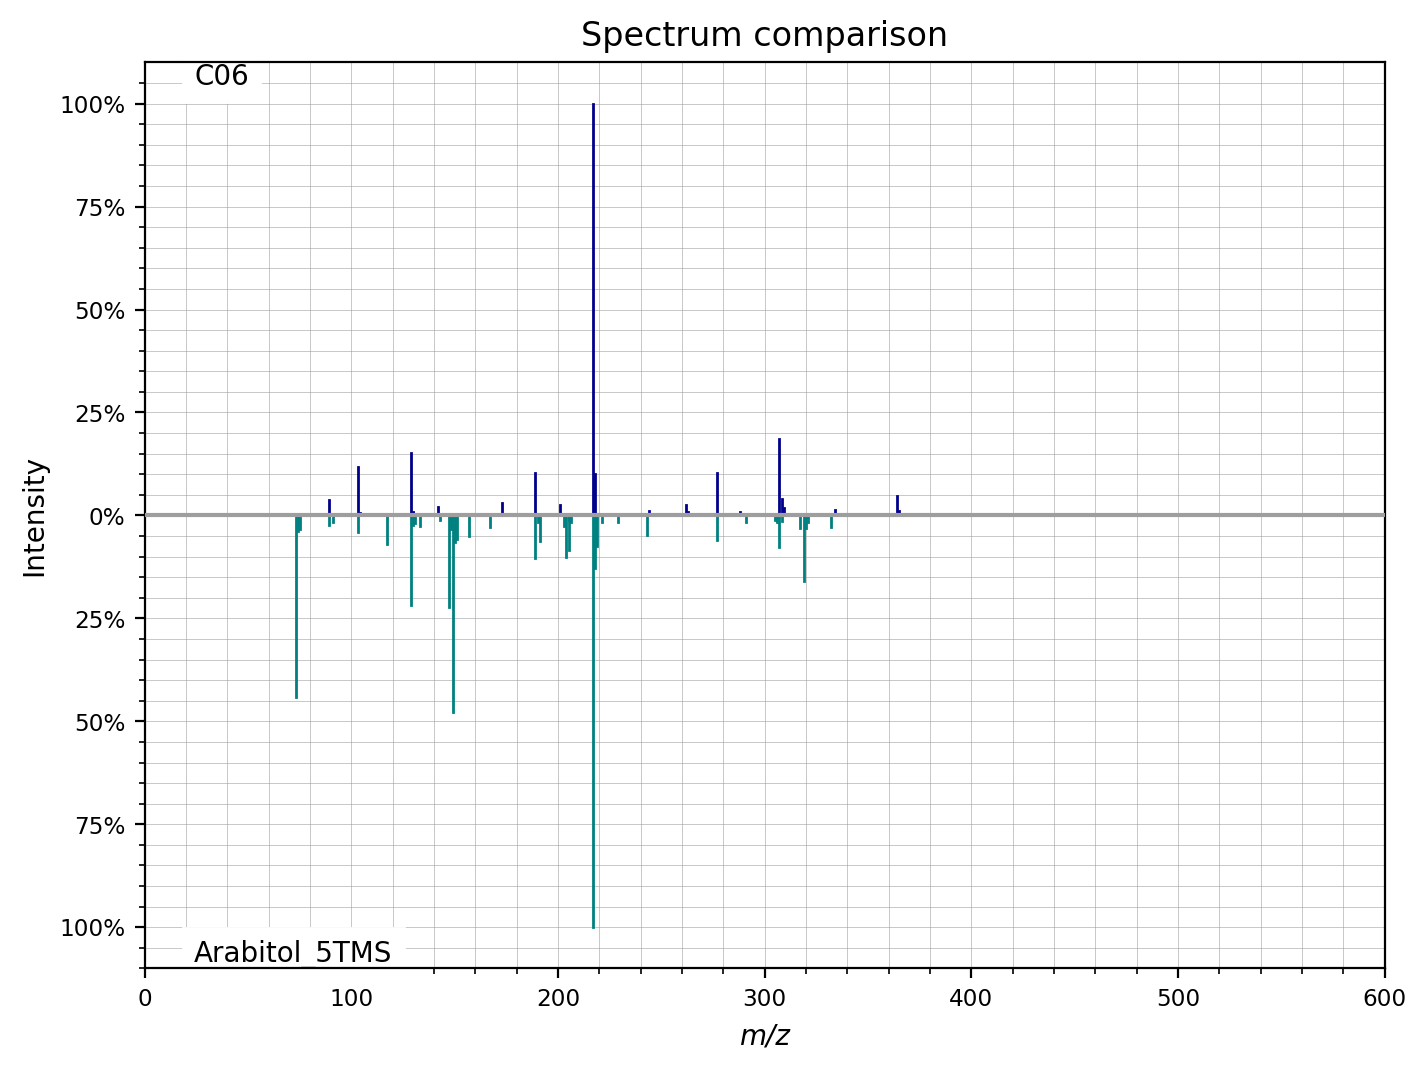

Spectrum C06 - detected peaks: 32
When matched to Arabitol_5TMS: 9 matched ions with 0.796552247937575 total confidence
In this match, 20 peaks were not in library spectrum and 33 peaks from library spectrum were missing


KeyboardInterrupt: 

In [91]:
from collections import defaultdict
conc = "all"
def get_order(matched, conc=conc):
    repetition_counter = defaultdict(lambda: 0)
    order_dict = dict()
    for meas_id in matched[conc].id:
        order_dict[(meas_id, repetition_counter[meas_id])] = int(matched[conc].n_ions[matched[conc].id == meas_id].values[repetition_counter[meas_id]])    
        repetition_counter[meas_id] += 1
    return order_dict

ordered = get_order(matched, conc)
for c in reversed(sorted(ordered, key=lambda x: ordered[x])):
    spec, lib = couple_plot(c[0], measured, library, matched, conc=conc, repetition_count=c[1])
    spec.plot_against(lib, figsize=(8, 6))
    
    spec_enh,lib = couple_plot(c[0], measured, library, matched, conc=conc+"_enh", repetition_count=c[1])
    spec_enh.plot_against(lib, figsize=(8, 6))
    plt.show()

In [130]:
ref = pd.read_csv("../data/11_KC_Confirmed_seminalplasma.csv.csv")
ref

,Average Rt(min),Average RI,Metabolite name
0,2.484,1224.68,2-Methylmalonic acid_2TMS
1,5.333,2071.84,Acetylgalactosamine_4TMS
2,5.318,2065.37,Acetylgalactosamine_5TMS isomer 1
3,5.386,2088.77,Acetylgalactosamine_5TMS isomer 2
4,5.328,2070.17,Acetylglucosamine_5TMS isomer 1
...,...,...,...
60,2.993,1377.14,Threonine_3TMS spectra 1
61,2.996,1378.30,Threonine_3TMS spectra 2
62,4.218,1732.44,trans-Aconitic acid_3TMS
63,5.717,2208.86,Tryptophan_3TMS


In [131]:
matched["all"]

,id,name,n_ions,confidence
1,C02,Lysine_4TMS,23,0.92281020332912
2,C02,Pipecolinic acid_2TMS,4,0.7553661382849925
3,C06,Arabitol_5TMS,9,0.796552247937575
4,C06,Arabitol_5TMS,9,0.7972294938455029
5,C06,Arabitol_5TMS,10,0.796552247937575
6,C06,Arabitol_5TMS,10,0.7972294938455029
7,C06,Fructose_5TMS isomer 1,15,0.8584115640959713
8,C06,Fructose_5TMS isomer 2,18,0.8766808769415186
9,C06,Galactitol_6TMS,7,0.7806173392109105
10,C06,"Gluconic acid-1,4-lactone",7,0.8218563911271052


In [132]:
ground = set(ref["Metabolite name"])
pred = set(matched["all"].name) 

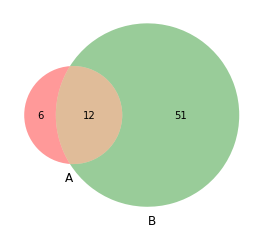

In [133]:
from matplotlib_venn import venn2
venn2((pred, ground))

In [190]:
from matchms import calculate_scores
from matchms.similarity import CosineHungarian

scores_orig = calculate_scores(
        references=list(library.values()),
        queries=list(measured["all"].values()),
        similarity_function=CosineHungarian(tolerance=0.1),
        is_symmetric=False
    )


In [224]:
# MISSING RI FILTERING AND HI-RES STEP
scores = calculate_scores(
        references=list(library.values()),
        queries=list(enhanced["all"].values()),
        similarity_function=CosineHungarian(tolerance=0.003),
        is_symmetric=False
    )

In [225]:

def get_outputs(args, scores):
    print("Storing outputs...")
    query_names = [spectra.metadata['compound_name'] for spectra in scores.queries]
    reference_names = [spectra.metadata['compound_name'] for spectra in scores.references]

    # Write scores to dataframe
    dataframe_scores = pd.DataFrame(data=[entry["score"] for entry in scores.scores], index=reference_names, columns=query_names)
    #dataframe_scores.to_csv(args.output_filename_scores, sep='\t')

    # Write number of matches to dataframe
    dataframe_matches = pd.DataFrame(data=[entry["matches"] for entry in scores.scores], index=reference_names, columns=query_names)
    #dataframe_matches.to_csv(args.output_filename_matches, sep='\t')

    return dataframe_scores, dataframe_matches

In [226]:
sc, m = get_outputs(None, scores)
sc_, m_ = pd.read_csv(get_galaxy_filename('CosineHungarian scores', '../data'), sep="\t", index_col=0),  pd.read_csv(get_galaxy_filename('CosineHungarian matches', '../data'), sep="\t", index_col=0)

Storing outputs...


In [227]:
m_.index

Index(['Acetylserotonin_2TMS isomer 2', 'Acetylserotonin_TMS derivative',
       'Acetylserotonin_3TMS', 'Acetylserotonin_2TMS isomer 1',
       'Methylnicotinamide', 'Pipecolinic acid_2TMS', 'Pipecolinic acid_1TMS',
       'Nicotinic acid_1TMS', 'Ribose_4TMS', 'Syringic acid_2TMS',
       ...
       '5-Methylcytidine_4TMS isomer 2', 'Acetylaspartic acid_2TMS',
       'Threonine_3TMS spectra 1', '2-Oxoadipic acid_2TMS isomer 2',
       '2-Oxoadipic acid_2TMS isomer 1', 'Cytidine_4TMS',
       'Dehydrocholesterol_1TMS', 'Dehydroergosterol_1TMS',
       'Cholestatrienol_1TMS', 'Proline_2TMS'],
      dtype='object', length=265)

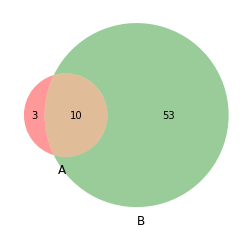

In [228]:
p = set(m.index[((m > 6) & (sc > 0.7)).any(axis=1)])
venn2((p, ground))

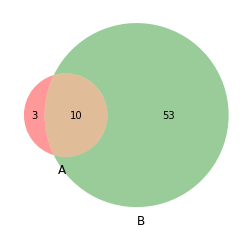

In [229]:
p_ = set(m_.index[((m_ > 6) & (sc_ > 0.7)).any(axis=1)])
venn2((p_, ground))

In [230]:
orig = np.zeros(shape=(20, 10))
new = orig.copy()
for i, n_m in enumerate(range(1,21)):
    for j, n_s in enumerate(np.arange(0,1,0.1)):
        p_orig = set(m_.index[((m_ > n_m) & (sc_ > n_s)).any(axis=1)])
        p_new = set(m.index[((m > n_m) & (sc > n_s)).any(axis=1)])
        orig[i,j] = len(p_orig.intersection(ground))/len(p_orig.difference(ground)) if len(p_orig.difference(ground)) != 0 else 0
        new[i,j] = len(p_new.intersection(ground))/len(p_new.difference(ground)) if len(p_new.difference(ground)) != 0 else 0
        

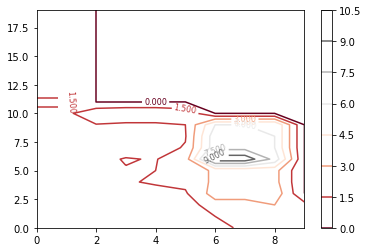

In [231]:
c = plt.contour(new, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()

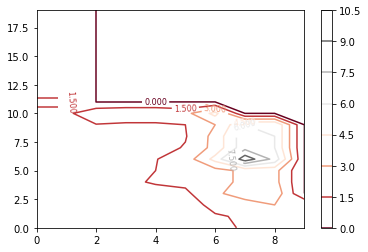

In [232]:
c = plt.contour(orig, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()


In [233]:
new.sum()

232.03973215491936

In [234]:
orig.sum()

219.1743404423724